In [17]:
!pip uninstall jupyter_contrib_nbextensions

^C


# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

# Table of Contents
1. [Introduction](#Introduction)
2. [Exploratory Data Analysis](#EDA)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Feature Engineering and Selection](#Feature-Selection)
5. [Cross Validation](#Cross-Validation)
6. [Model Development](#Model-Development)
7. [Risk Stratification](#Risk-Stratification)
8. [Observations and Insights](#Insights)
9. [Conclusion](#Conclusion)

## 1. Introduction and Objectives <a id="Introduction"></a>

This project aims to leverage the power of machine learning (ML) to develop a robust and interpretable predictive model for CVD. By incorporating Explainable AI (XAI) techniques, the model strives to address the "black-box" nature of traditional ML models, enhancing the trust and understanding of healthcare professionals. Additionally, the integration of risk stratification will provide a comprehensive assessment of patient risk levels, ensuring actionable insights for clinical decision-making. <br />

Objectives
- O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors. <br />
- O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing techniques to ensure the dataset used in this study is of high quality. <br />

- O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning techniques, for predicting cardiovascular disease. <br />
- O4: Optimal Feature Selection- Identify significant predictive features whose presence improves the accuracy of CVD prediction. <br />
- O5: Machine Learning Model Development- Develop a model for predicting cardiovascular diseases with various ML algorithms, deep learning techniques, and risk stratification. <br />
- O6: Model Performance Evaluation- Evaluate the developed model to check its predictive accuracy and interpretability by employing relevant evaluation metrics.


### Attribute Description

Demographics
- **male**: (1 = Male, 0 = Female)
- **age**: Age of the individual
- **education**: Level of education </br>

Medical factors
- **BPMeds**:  (1 = Taking blood pressure medication, 0 = Not taking)
- **prevalentStroke**: (1 = History of stroke, 0 = No history)
- **prevalentHyp**: (1 = History of hypertension, 0 = No history)
- **diabetes**: (1 = Diagnosed with diabetes, 0 = Not diagnosed)
- **totChol**: Total cholesterol level (mg/dL)
- **sysBP**: Systolic blood pressure (mmHg)
- **diaBP**: Diastolic blood pressure (mmHg)
- **BMI**: Body Mass Index (BMI) of the individual
- **heartRate**: Resting heart rate (beats per minute)
- **glucose**: Blood glucose level (mg/dL) </br>

Lifestyle factors
- **currentSmoker**:(1 = Current smoker, 0 = Non-smoker)
- **cigsPerDay**: Number of cigarettes smoked per day </br>

Target variable
- **TenYearCHD**: Binary target variable (1 = Individual developed CHD within 10 years, 0 = Did not develop CHD)


In [11]:
#  Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import shap
import lime
import lime.lime_tabular
import joblib
import tensorflow as tf
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve,  roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import hvplot.pandas  

In [13]:
# Import the dataset
heart_data = pd.read_csv('data/framingham.csv')
# Print the first 10 lines of the dataset
print(heart_data.head(10)) 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  2

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
# Checking the data shape
heart_data.shape

(4240, 16)


The dataset has 4240 rows and 16 columns for different attributes. In the next step, we check for missing values in the data.

In [4]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [15]:
# Remove rows with missing values
heart_data = heart_data.dropna()

# Verify if all missing values are removed
print("Missing Values After Removal:\n", heart_data.isnull().sum())


Missing Values After Removal:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


There are missing values in certain attributes like education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose.
Total number of missing values is 645. As it conforms to a small weightage of the total dataset, the missing values are removed.

In [29]:
# Check for duplicate records
duplicates = heart_data.duplicated().sum()
print(f"\nDuplicate Records Found: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    heart_data = heart_data.drop_duplicates()
    print("Duplicates Removed!")


Duplicate Records Found: 0


Data Integrity Review </br>

- The main information, first 10 lines and the shape of the dataset were examined. </br>
- Missing Values Analysis: Checked for missing values across all features. </br>
Key Findings: Some attributes contained missing values.  </br>
Action Taken: Missing values were either imputed using median values or removed if necessary to maintain data consistency.  </br>

- Duplicate Records Detection </br>
Key Findings: No duplicate entries were found. </br>


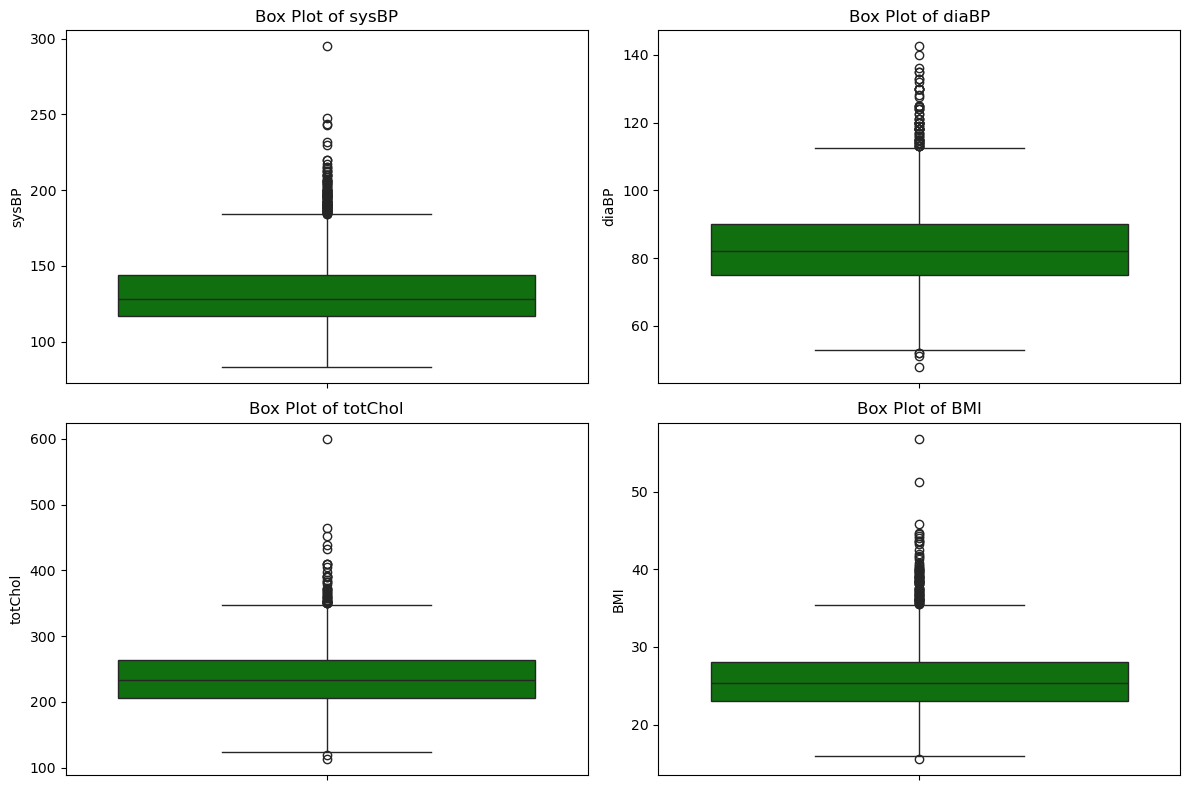

In [21]:
box_columns = ["sysBP", "diaBP", "totChol", "BMI"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(box_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=heart_data[col], color="green")
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


## 2. Exploratory Data Analysis <a id="EDA"></a>

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using statistics, visualizations, and correlation heatmaps to uncover key insights about the heart disease dataset.

In [31]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

male     age  education  currentSmoker  cigsPerDay  BPMeds  \
count 3658.00 3658.00    3658.00        3658.00     3658.00 3658.00   
mean     0.44   49.55       1.98           0.49        9.03    0.03   
std      0.50    8.56       1.02           0.50       11.92    0.17   
min      0.00   32.00       1.00           0.00        0.00    0.00   
25%      0.00   42.00       1.00           0.00        0.00    0.00   
50%      0.00   49.00       2.00           0.00        0.00    0.00   
75%      1.00   56.00       3.00           1.00       20.00    0.00   
max      1.00   70.00       4.00           1.00       70.00    1.00   

       prevalentStroke  prevalentHyp  diabetes  totChol   sysBP   diaBP  \
count          3658.00       3658.00   3658.00  3658.00 3658.00 3658.00   
mean              0.01          0.31      0.03   236.85  132.37   82.92   
std               0.08          0.46      0.16    44.10   22.09   11.97   
min               0.00          0.00      0.00   113.00   83.50   48.00   
25%               0.00          0.00      0.00   206.00  117.00   75.00   
50%               0.00          0.00      0.00   234.00  128.00   82.00   
75%               0.00          1.00      0.00   263.00  143.88   90.00   
max               1.00          1.00      1.00   600.00  295.00  142.50   

          BMI  heartRate  glucose  TenYearCHD  
count 3658.00    3658.00  3658.00     3658.00  
mean    25.78      75.73    81.85        0.15  
std      4.07      11.98    23.90        0.36  
min     15.54      44.00    40.00        0.00  
25%     23.08      68.00    71.00        0.00  
50%     25.38      75.00    78.00        0.00  
75%     28.04      82.00    87.00        0.00  
max     56.80     143.00   394.00        1.00

##### **Insights**
The dataset consists of 44% males and 56% females, making the gender class relatively balanced. <br>
Age : The dataset contains individuals aged 32 to 70 years, with a median of 49 years. <br>

Cholesterol levels range from 113 to 600 mg/dL.<br>
BPMeds (0.03 mean): Only 3% of the population is on blood pressure medication.<br>
Prevalent Stroke (0.01 mean): Stroke cases are very rare (only 1% of individuals).<br>
31% of individuals have hypertension, which is a significant portion of the dataset.<br>

BMI (Mean: 25.78, Max: 56.80): The average BMI is 25.78, which is considered slightly overweight.  <br>

Only 3% of individuals have diabetes, meaning it's an imbalanced feature. <br>
TenYearCHD (0.15 mean): 15% of individuals have developed CHD (Cardiovascular Disease) within ten years.<br>
The dataset is imbalanced, as 85% did not develop CHD.<br>

Almost half of the population are current smokers.<br>
CigsPerDay (Mean: 9.03, Max: 70):  The median (50%) is 0, meaning at least half of the individuals don’t smoke.<br>
However, some individuals smoke as many as 70 cigarettes per day.<br>


#### Distribution of the Dependent variable

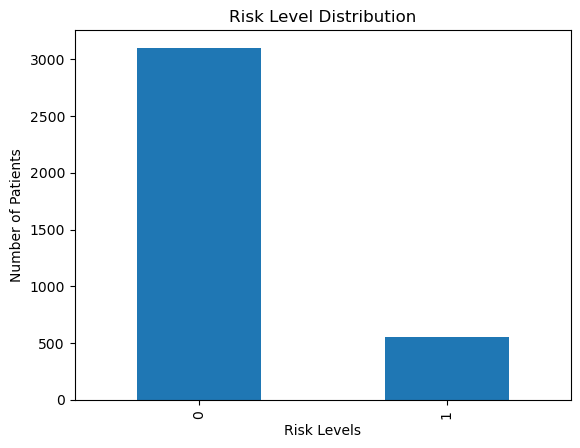

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [7]:
# Plot risk level distribution
heart_data['TenYearCHD'].value_counts().plot(kind='bar')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Levels")
plt.ylabel("Number of Patients")
plt.show()
print(heart_data['TenYearCHD'].value_counts())

There is a class imbalance in the TenYearCHD class.

#### Distribution of Continous variable

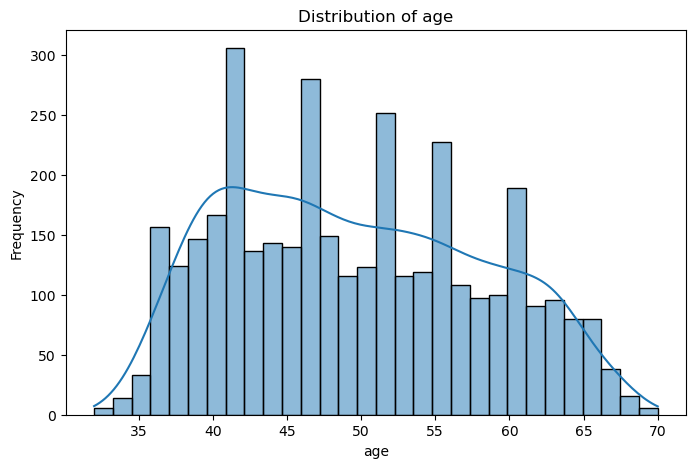

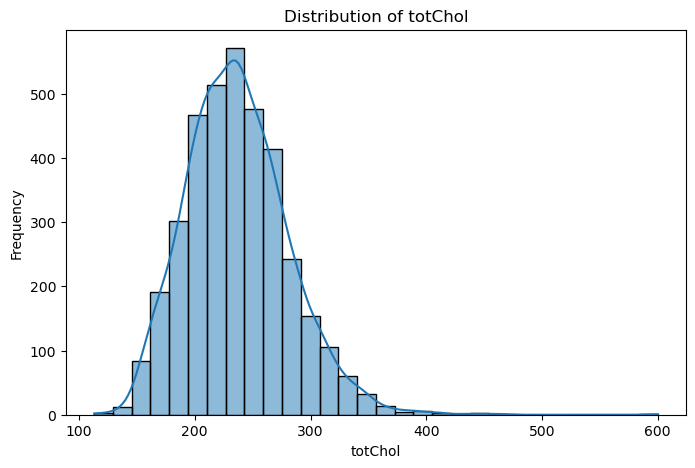

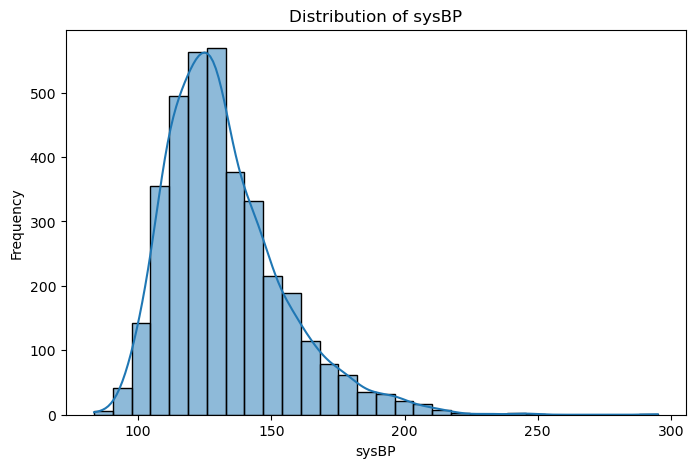

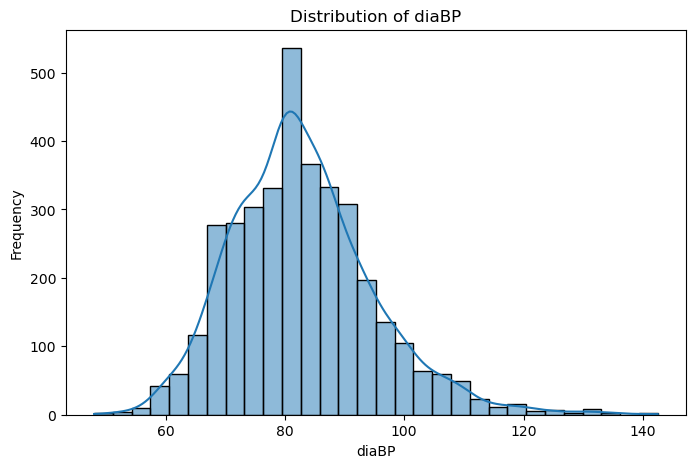

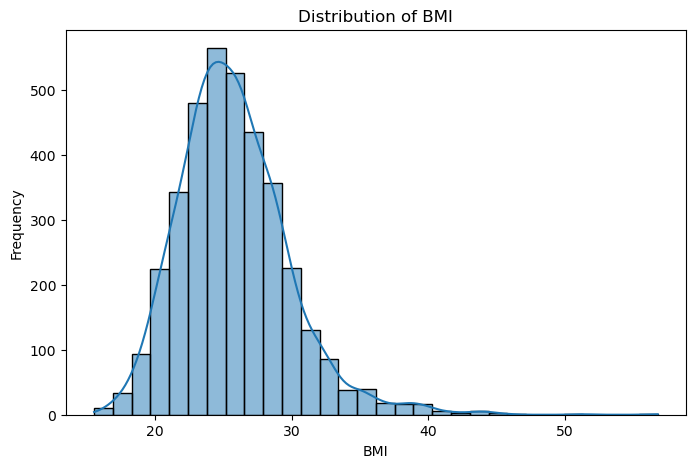

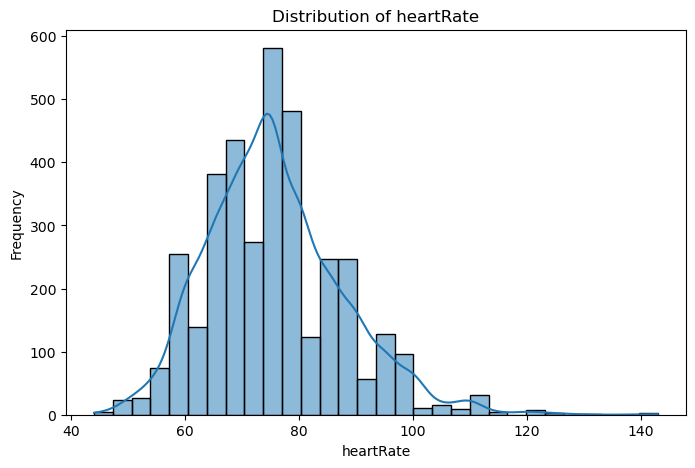

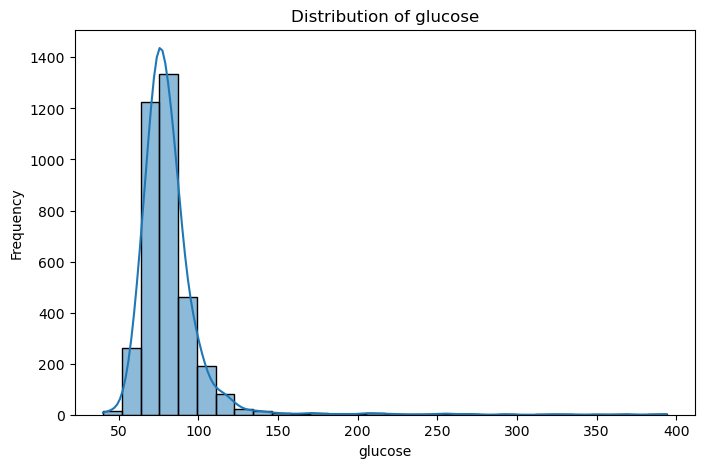

In [10]:
# Distribution of key numeric features
key_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

The visualization provides a visual representation of the distribution of values in the continous variable in the dataset. This enables the reader to analyse the data distribution and understand if it follows a normal distribution, skewed to the left or right, or has multiple peaks. It can also help to identify outliers and anomalies in the data, which can be further investigated and addressed as needed.</br>

Insights </br>
From the graphs, it is shown that most of the continuous variables have a skew towards the left (either slight or high). Some variables have outliers. 

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

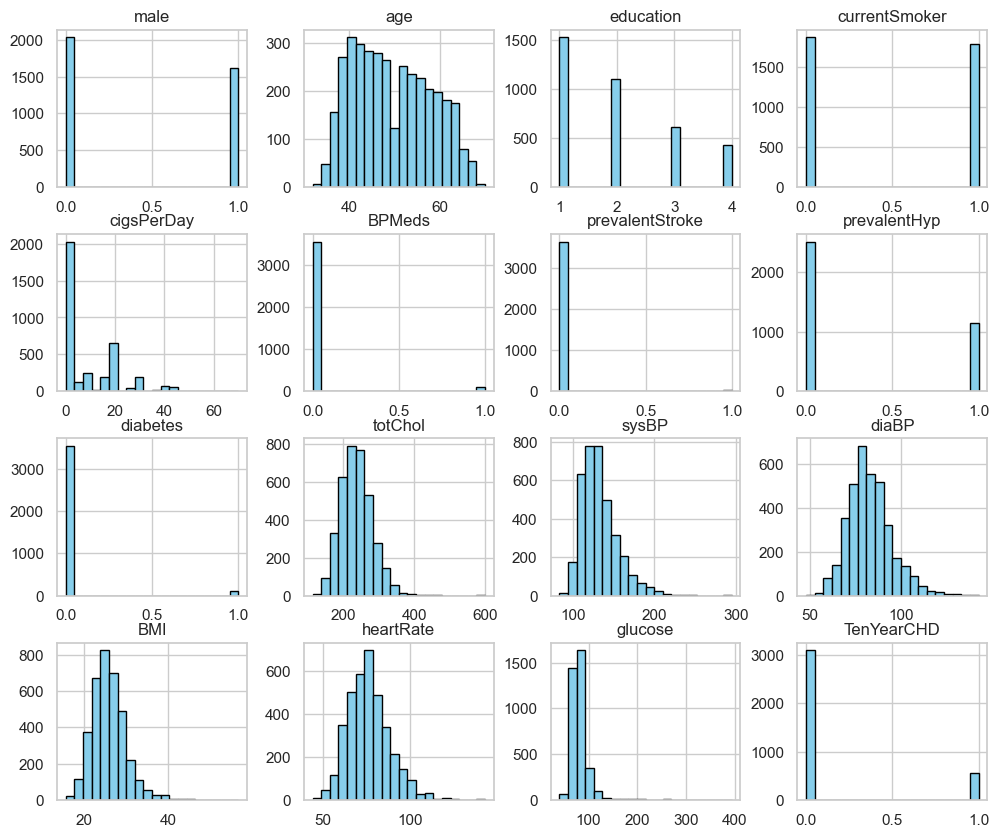

In [48]:
# Histograms to show distribution of attributes
heart_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

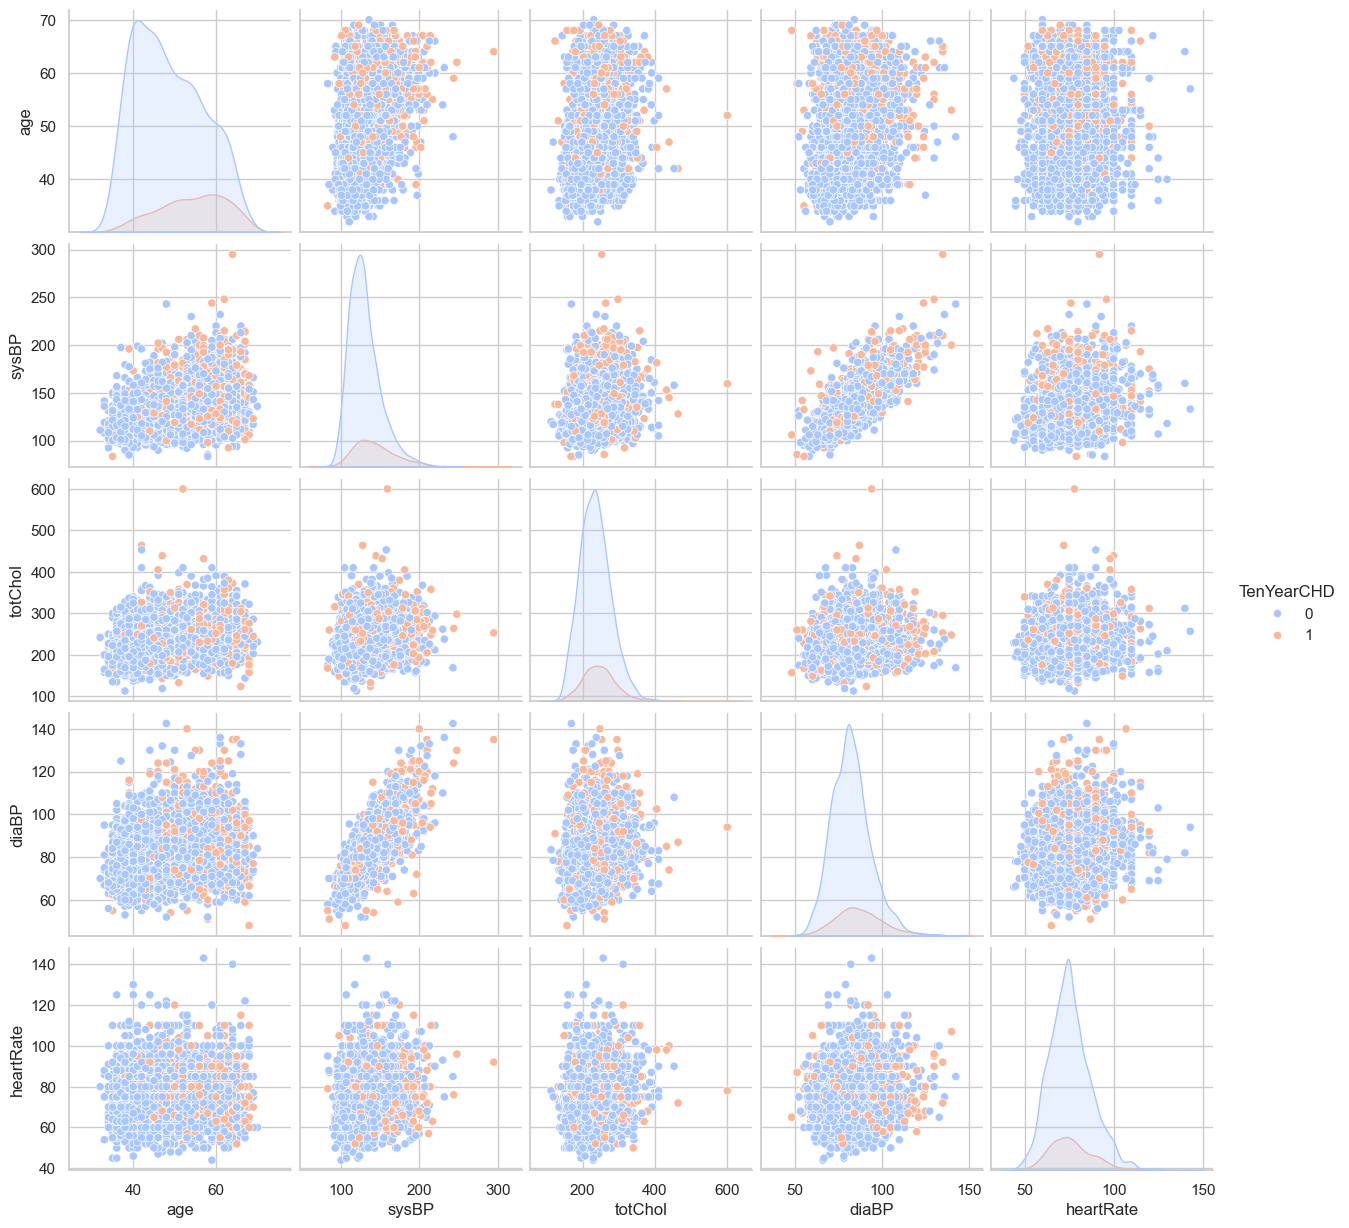

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Pair Plot: Relationships Between Key Numerical Features
num_features = ["age", "sysBP", "totChol", "diaBP", "heartRate"]
sns.pairplot(heart_data, hue="TenYearCHD", vars=num_features, diag_kind="kde", palette="coolwarm")
plt.show()




##### Insights from histograms 

- Age: The distribution is slightly right-skewed, with most individuals between 40 to 60 years. </br>
- CigsPerDay: The majority of people either don’t smoke or smoke very little. </br>
- TotChol: Roughly normal distribution, centered around 200–250 mg/dL. </br>
- SysBP: Slightly right-skewed, with most values between 110 and 180 mmHg. </br>
- Heart Rate: Normally distributed, with most values around 60–90 bpm.

#### Box plots 

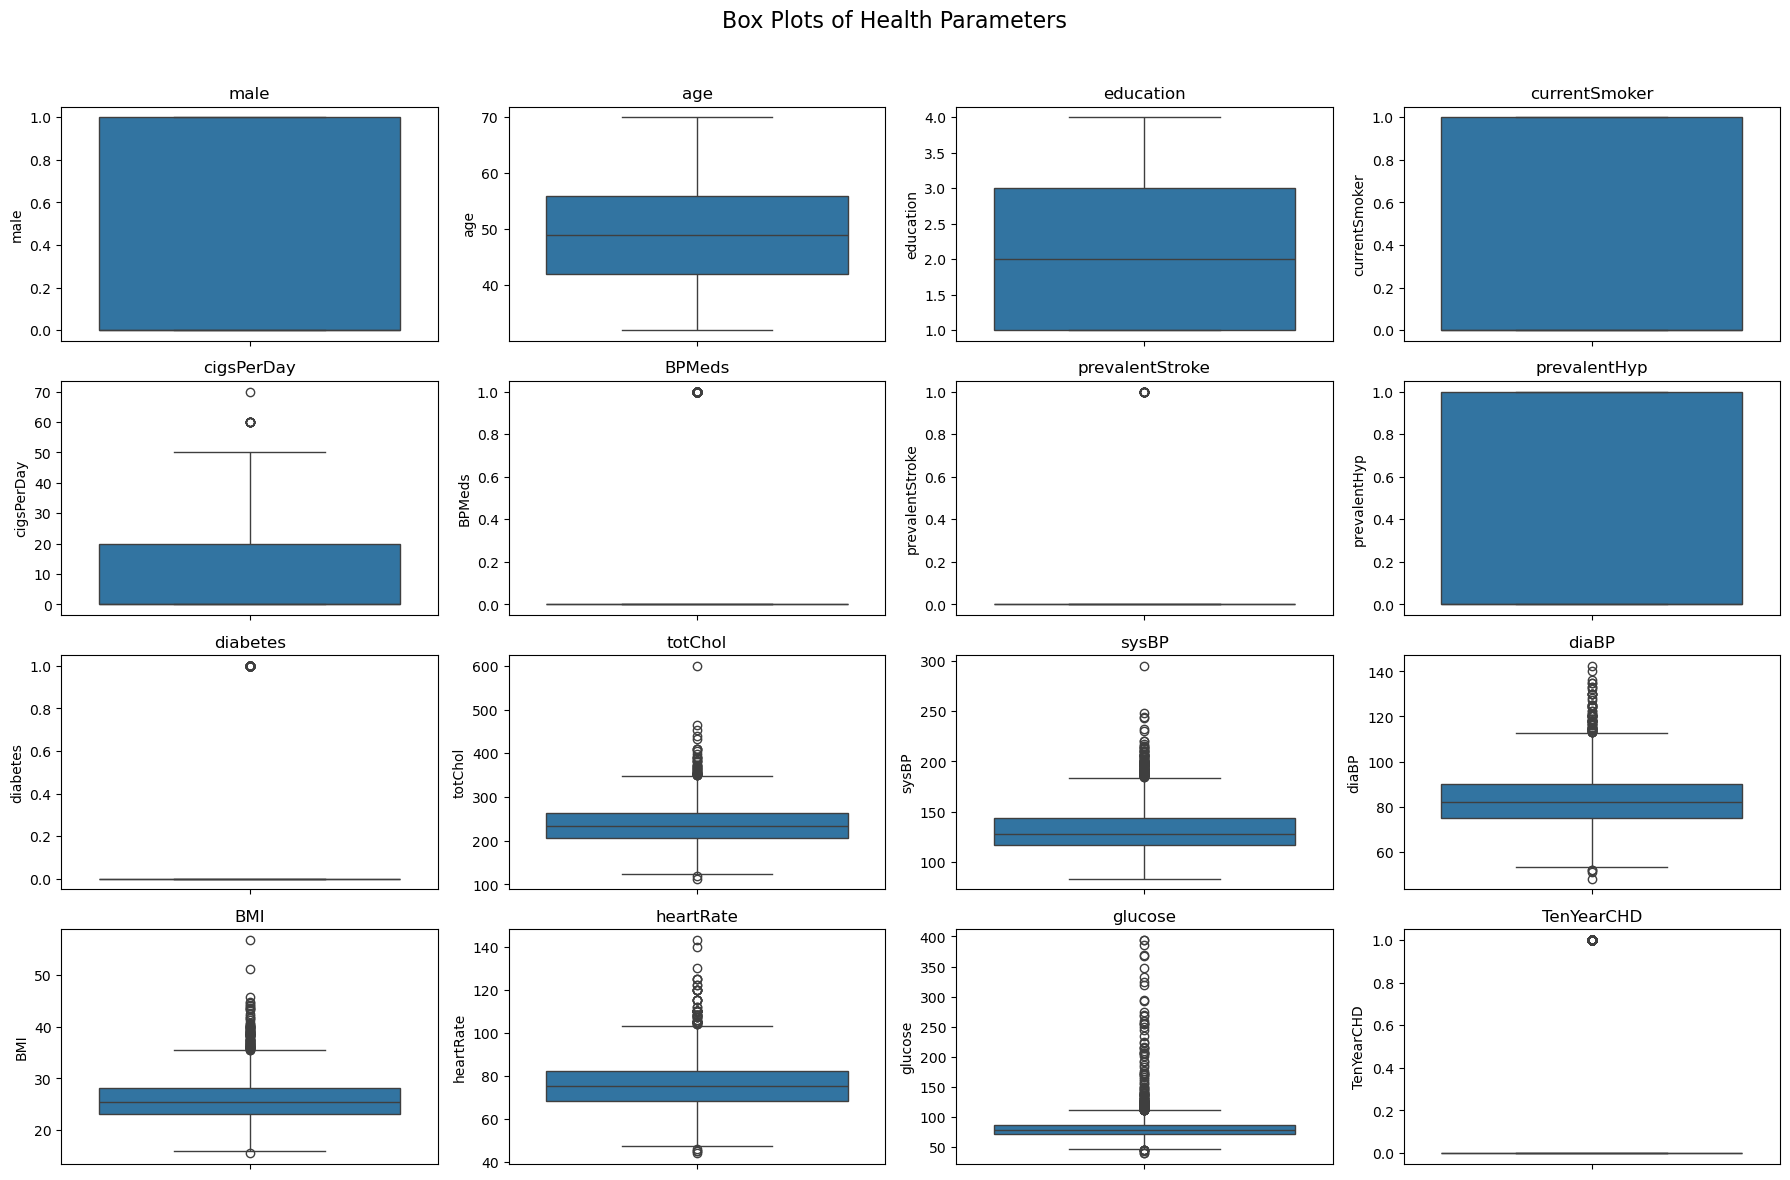

In [13]:
# Creating subplots for better visibility of each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
fig.suptitle("Box Plots of Health Parameters", fontsize=16)

# Loop through the columns and plot each one
for ax, col in zip(axes.flatten(), heart_data.columns):
    sns.boxplot(y=heart_data[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Relationship between Continous variables and the Dependent variable

In [14]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(heart_data, x='age', y='totChol', color='TenYearCHD',
                 title="CHD Risk by Age and Cholesterol",
                 labels={'age': 'Age', 'totChol': 'Total Cholesterol'},
                 hover_data=['sysBP'],
                 color_continuous_scale='Viridis')
fig.show()


In [15]:

heart_data['Gender'] = heart_data['male'].map({1: 'Male', 0: 'Female'})

# Create age bins for better visualization
heart_data['Age_Group'] = pd.cut(heart_data['age'], bins=[30, 40, 50, 60, 70, 80],
                                 labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Convert Age_Group to string for proper grouping
heart_data['Age_Group'] = heart_data['Age_Group'].astype(str)

# Aggregate data: CHD prevalence by Age Group and Gender, convert to percentage
age_gender_chd = heart_data.groupby(['Age_Group', 'Gender'])['TenYearCHD'].mean().reset_index()
age_gender_chd['TenYearCHD'] *= 100  

# Create an interactive bar chart with CHD risk in %
fig = px.bar(age_gender_chd, 
             x='Age_Group', 
             y='TenYearCHD', 
             color='Gender',
             barmode='group',
             title="10-Year CHD Risk by Age Group and Gender",
             labels={'TenYearCHD': 'Average CHD Risk (%)', 'Age_Group': 'Age Group'},
             text=age_gender_chd['TenYearCHD'].round(2))  # Display risk values in %

# Show the interactive chart
fig.show()


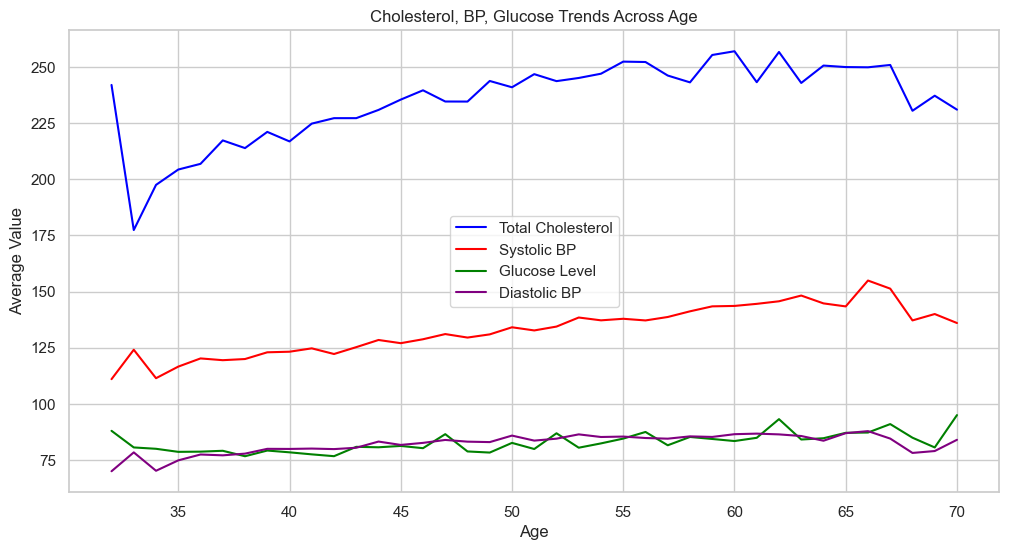

In [34]:
# Group Data by Age (For Smoothed Line Graph)
age_grouped = heart_data.groupby("age").mean()  # Aggregating numerical features by age

### 📌 1. Line Graph: Cholesterol, BP, and Smoking Trends Across Age
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_grouped.index, y=age_grouped['totChol'], label="Total Cholesterol", color="blue")
sns.lineplot(x=age_grouped.index, y=age_grouped['sysBP'], label="Systolic BP", color="red")
sns.lineplot(x=age_grouped.index, y=age_grouped['glucose'], label="Glucose Level", color="green")
sns.lineplot(x=age_grouped.index, y=age_grouped['diaBP'], label="Diastolic BP", color="purple")

plt.title("Cholesterol, BP, Glucose Trends Across Age")
plt.xlabel("Age")
plt.ylabel("Average Value")
plt.legend()
plt.show()



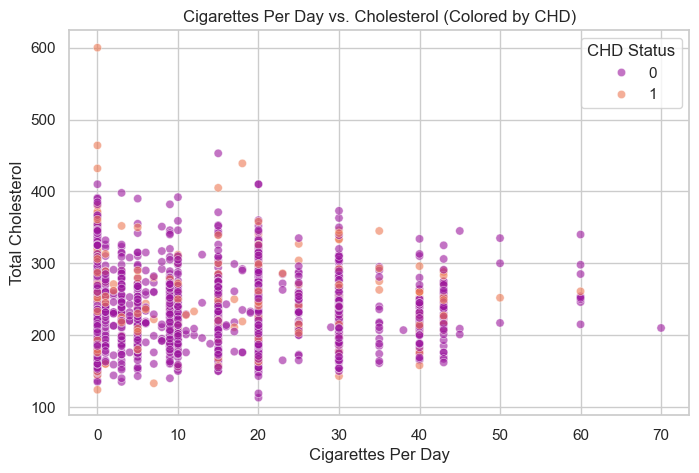

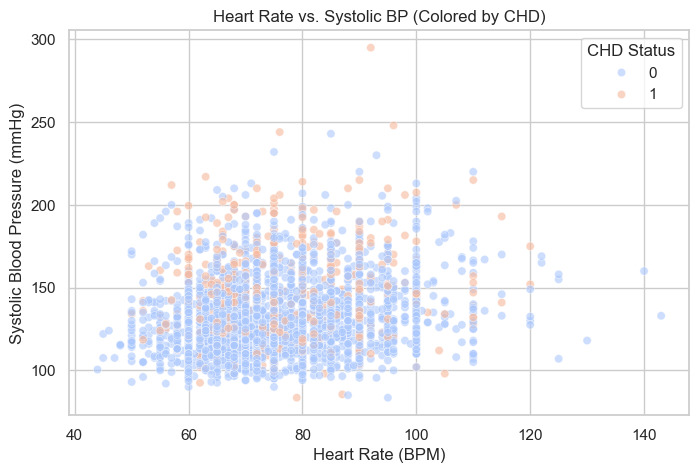

In [ ]:

### Cigarettes Per Day vs. Cholesterol
plt.figure(figsize=(8, 5))
sns.scatterplot(x="cigsPerDay", y="totChol", hue="TenYearCHD", data=heart_data, alpha=0.6, palette="plasma")
plt.title("Cigarettes Per Day vs. Cholesterol (Colored by CHD)")
plt.xlabel("Cigarettes Per Day")
plt.ylabel("Total Cholesterol")
plt.legend(title="CHD Status")
plt.show()

###  Heart Rate vs. Systolic Blood Pressure
plt.figure(figsize=(8, 5))
sns.scatterplot(x="heartRate", y="sysBP", hue="TenYearCHD", data=heart_data, alpha=0.6, palette="coolwarm")
plt.title("Heart Rate vs. Systolic BP (Colored by CHD)")
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.legend(title="CHD Status")
plt.show()


#### Distribution between Discrete Variables and the Target Variable

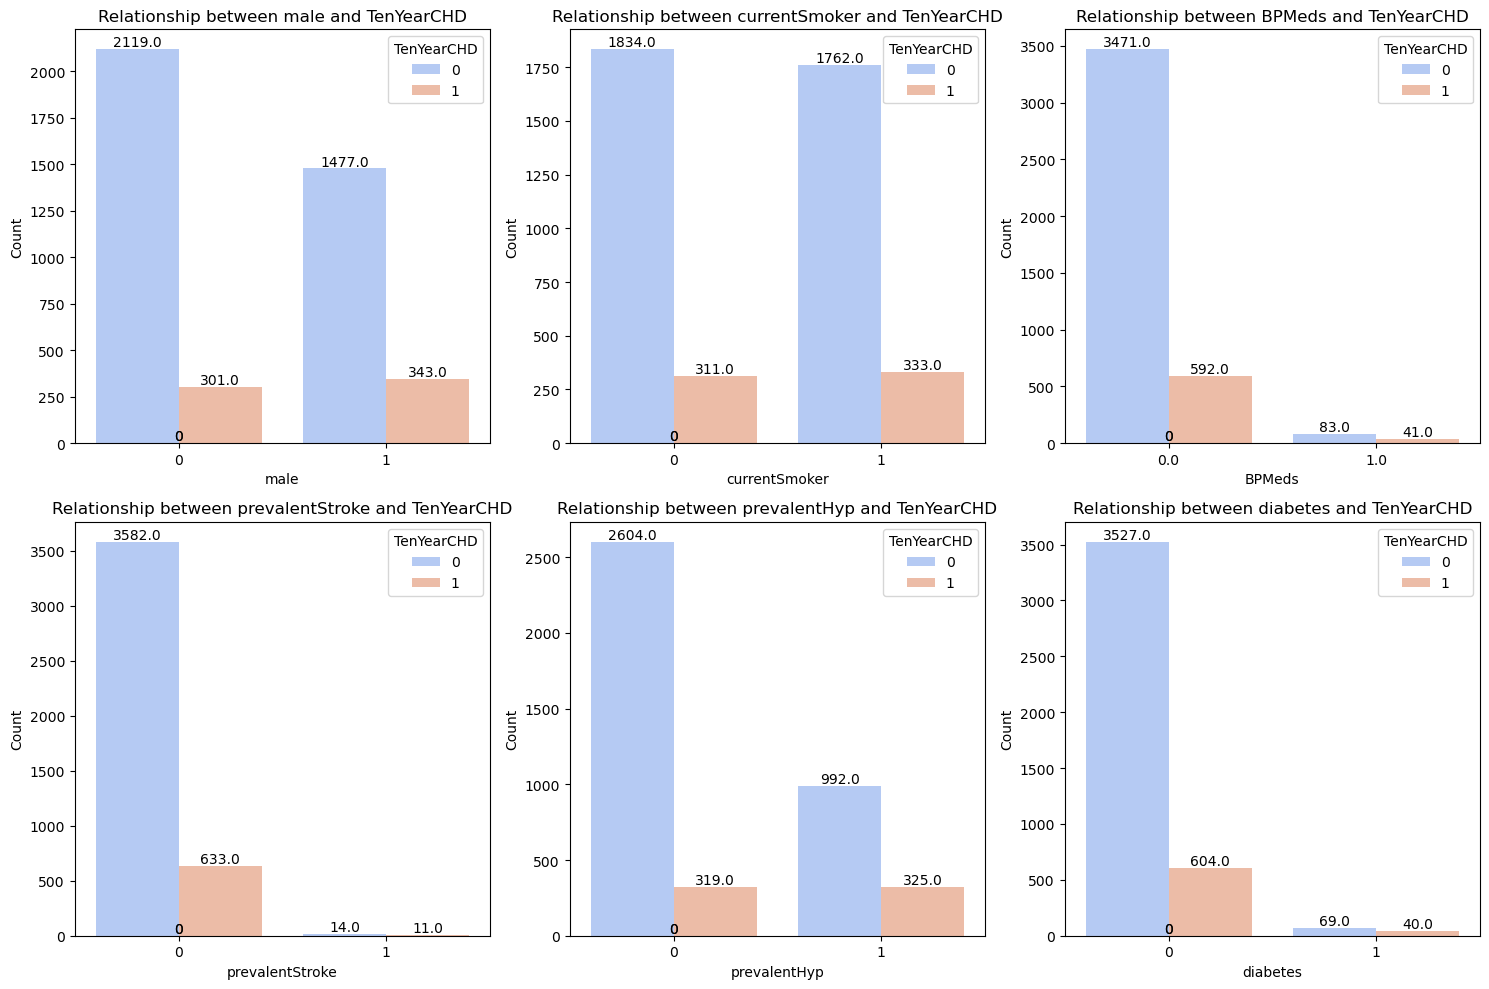

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define discrete categorical variables
discrete_vars = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
target_var = "TenYearCHD"

# Function to plot the relationship between discrete variables and TenYearCHD
def plot_discrete_vs_target(df, discrete_vars, target_var):
    plt.figure(figsize=(15, 10))
    
    for i, var in enumerate(discrete_vars, 1):
        plt.subplot(2, 3, i)
        ax = sns.countplot(x=var, hue=target_var, data=df, palette="coolwarm")
        plt.title(f"Relationship between {var} and {target_var}")
        plt.xlabel(var)
        plt.ylabel("Count")
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

# Call function to plot the graphs
plot_discrete_vs_target(heart_data, discrete_vars, target_var)


The count plot (bar plot) is chosen for visualizing the relationship between discrete (categorical) independent variables and the dependent variable (TenYearCHD)</br>

Insights from the graph</br>
Smoking and CHD Risk</br>
The number of smokers (is_smoking=1) with CHD is similar to that of non-smokers.
This suggests that smoking alone might not be the strongest indicator of CHD, but could be a contributing factor when combined with other variables.</br>

Hypertension and CHD Risk</br>
Individuals with a history of hypertension (prevalentHyp=1) have a much higher rate of CHD.
This aligns with medical knowledge, as high blood pressure is a well-known risk factor for heart disease.

#### Correlation Heatmap

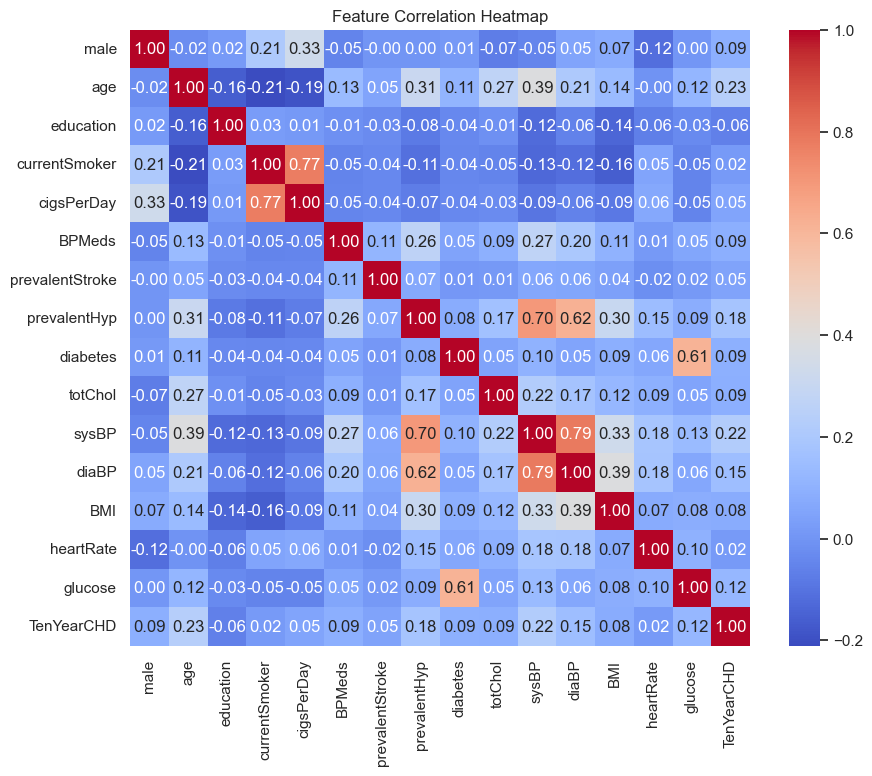

In [22]:
columns_to_drop = ['Gender', 'Age_Group', 'FraminghamRisk', 'RiskCategory'] # Dropping the engineered columns
existing_columns = [col for col in columns_to_drop if col in heart_data.columns]
heart_data = heart_data.drop(columns=existing_columns, errors='ignore')  # Ignores missing columns

# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'TenYearCHD'
correlations = numeric_data.drop('TenYearCHD', axis=1).corrwith(numeric_data['TenYearCHD'])

# Plot correlation using hvplot
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

##### **Feature Correlation Analysis**

The correlation heatmap visually represents the relationships between various features in the dataset. It highlights both positive and negative correlations, which can be used to select significant predictors for the model. Features with strong correlations (positive or negative) with the target variable (`TenYearCHD`) are crucial for prediction.

##### **Key Observations**:
1. **Strong Correlations**:
   - `Age` shows a high positive correlation with the target variable (`TenYearCHD`), indicating people who are older have more risk of heart disease.
   - `sysBP` and `prevalentHyp ` also show a slight positive correlation with `TenYearCHD`.
   - `sysBP` and `diaBP` are strongly correlated with each other.

2. **Negative Correlations**:
   - `education` has a  negative correlation with `TenYearCHD`, suggesting an inverse proportion.

3. **Low or Neutral Correlations**:
   - Features like `heartRate` and `currentSmoker` have weaker correlations with the target variable.

Hypothesis Testing

Hypothesis Test: Does Hypertension Increase CHD Risk?
Hypothesis Statement
Null Hypothesis (H₀): There is no significant difference in the proportion of CHD cases between people with and without hypertension.
Alternative Hypothesis (H₁): People with hypertension have a significantly higher risk of CHD.
Test Used: Chi-Square Test for Independence
Since both prevalentHyp (hypertension) and TenYearCHD (CHD risk) are categorical variables, we use a Chi-Square test.



In [6]:
import pandas as pd
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(heart_data['prevalentHyp'], heart_data['TenYearCHD'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print("📊 **Hypothesis Test: Does Hypertension Increase CHD Risk?**")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpretation
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("🔴 **Reject the Null Hypothesis:** There is a significant association between Hypertension and CHD risk.")
else:
    print("🟢 **Fail to Reject the Null Hypothesis:** No significant association between Hypertension and CHD risk.")


📊 **Hypothesis Test: Does Hypertension Increase CHD Risk?**
Chi-Square Statistic: 132.46
P-Value: 0.00000
🔴 **Reject the Null Hypothesis:** There is a significant association between Hypertension and CHD risk.


## 3. Data Processing  <a id="Data-Preprocessing"></a>

After exploring the dataset, the following preprocessing steps were carried out.
#### **1. Handling Missing Values**
- Rows or columns with significant missing values were removed to avoid introducing bias into the model.
- **Justification**: Imputation techniques were considered but not implemented due to potential distortion in small datasets. Eliminating incomplete data ensures that the model trains on accurate information.

#### **2. Splitting the Dataset**
- The dataset was split into training and testing sets (80% training, 20% testing).
- **Justification**: This ensures that the model can generalize to unseen data, allowing for reliable evaluation of its performance.

#### **3. Feature Scaling**
- Standardization was applied to scale features like cholesterol and blood pressure to have a mean of zero and a standard deviation of one.
- **Justification**: Scaling ensures that the gradient-based optimization processes during model training converge more efficiently.


We dropped the rows with missing values. Since education column does not affect the dataset significantly and has a negative correlation, we remove that column. We also remove currentSmoker because of the redundancy of information with respect to cigsPerDay. 

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Drop 'education' column
heart_data.drop(columns=['education'], inplace=True)

# Separate features and target variable
X = heart_data.drop(columns=["TenYearCHD"]) 
y = heart_data["TenYearCHD"] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Apply the same transformation to the test set
joblib.dump(scaler, "model/scaler_framingham_balanced.pkl")
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape (After SMOTE):", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)
print("Class Distribution After SMOTE:\n", pd.Series(y_train).value_counts())  # Check the new balance


Full Dataset Shape: (3658, 14)
Training Dataset Shape (After SMOTE): (4960, 14)
Testing Dataset Shape: (732, 14)
Class Distribution After SMOTE:
 TenYearCHD
0    2480
1    2480
Name: count, dtype: int64


In [56]:
# # 🚀 Feature Impact Analysis Using Logistic Regression

# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Train Logistic Regression Model
# log_model = LogisticRegression()
# log_model.fit(X, y)  # Train on full dataset

# # Extract Coefficients
# feature_names = X.columns
# coefficients = log_model.coef_[0]  # Extract coefficients

# # Convert Coefficients to Odds Ratios
# odds_ratios = np.exp(coefficients)  # Exponentiate to interpret change in odds

# # Format and Interpret Coefficients
# interpretations = []
# for feature, odds_ratio in zip(feature_names, odds_ratios):
#     percent_change = round((odds_ratio - 1) * 100, 2)  # Convert to percentage
#     if percent_change > 0:
#         interpretation = f"🔹 For every unit increase in **{feature}**, the odds of CHD increase by **{percent_change}%**."
#     else:
#         interpretation = f"🔹 For every unit increase in **{feature}**, the odds of CHD decrease by **{abs(percent_change)}%**."
#     interpretations.append(interpretation)

# #  Display Interpretations
# print("\n📊 **Feature Insights on CHD Risk:**\n")
# for insight in interpretations:
#     print(insight)

## 4. Feature Engineering and Selection  <a id="Feature-Selection"></a>

In [8]:
from xgboost import XGBClassifier
importances = XGBClassifier().fit(X, y).feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
print(feature_importance_df.sort_values(by="Importance", ascending=False))


         Feature  Importance
1            age    0.136338
0           male    0.127199
4   prevalentHyp    0.119046
3         BPMeds    0.099943
7          sysBP    0.076367
2     cigsPerDay    0.073889
11       glucose    0.072153
9            BMI    0.070520
6        totChol    0.065110
8          diaBP    0.063734
10     heartRate    0.061140
5       diabetes    0.034561


In [37]:
# 3. SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data, so ensure normalization
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)


Selected Features by Chi-Squared Test:
 Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')


'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'. <br>
These features likely have a strong relationship with the target variable.

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Top Features Based on ANOVA F-test:")
print(feature_scores.sort_values(by='Score', ascending=False))


Top Features Based on ANOVA F-test:
            Feature  Score
1               age 211.75
10            sysBP 191.00
7      prevalentHyp 124.38
11            diaBP  84.30
14          glucose  55.23
8          diabetes  32.20
0              male  31.00
9           totChol  30.76
5            BPMeds  29.29
12              BMI  24.78
2         education  14.70
4        cigsPerDay   9.92
6   prevalentStroke   8.57
13        heartRate   1.54
3     currentSmoker   1.34


Age shows the highest F-test score, making it a significant predictor for heart disease. <br>
Both methods highlight overlapping features (age, sysBP , glucose), validating their importance for prediction.

In [41]:
def framingham_risk_score(age, totChol, hdl, sysBP, smoker, diabetes, gender):
    if gender == 1:  # Male
        risk_score = (52.00961 - (20.014077 * np.log(age)) + (0.65304 * np.log(totChol))
                      - (0.38698 * np.log(hdl)) + (1.90997 * np.log(sysBP)) + (0.60138 * smoker)
                      + (0.57367 * diabetes))
        s0 = 0.88936  # Baseline survival probability for men
    else:  # Female
        risk_score = (31.764 - (26.0145 * np.log(age)) + (1.1237 * np.log(totChol))
                      - (0.93263 * np.log(hdl)) + (2.5536 * np.log(sysBP)) + (0.65451 * smoker)
                      + (0.87976 * diabetes))
        s0 = 0.95012  # Baseline survival probability for women

    risk_percentage = 1 - s0 ** (np.exp(risk_score))
    return round(risk_percentage * 100, 2)

# Compute Framingham Risk Score for each row
heart_data["FraminghamRisk"] = heart_data.apply(lambda row: framingham_risk_score(row["age"], row["totChol"], 
                                                                  row["diaBP"], row["sysBP"], 
                                                                  row["currentSmoker"], row["diabetes"], row["male"]), axis=1)

# Define Risk Stratification (Low, Medium, High)
def stratify_risk(risk_score):
    if risk_score < 10:
        return "Low Risk"
    elif risk_score < 20:
        return "Moderate Risk"
    else:
        return "High Risk"

heart_data["RiskCategory"] = heart_data["FraminghamRisk"].apply(stratify_risk)



PermutationExplainer explainer: 733it [06:10,  1.97it/s]                         


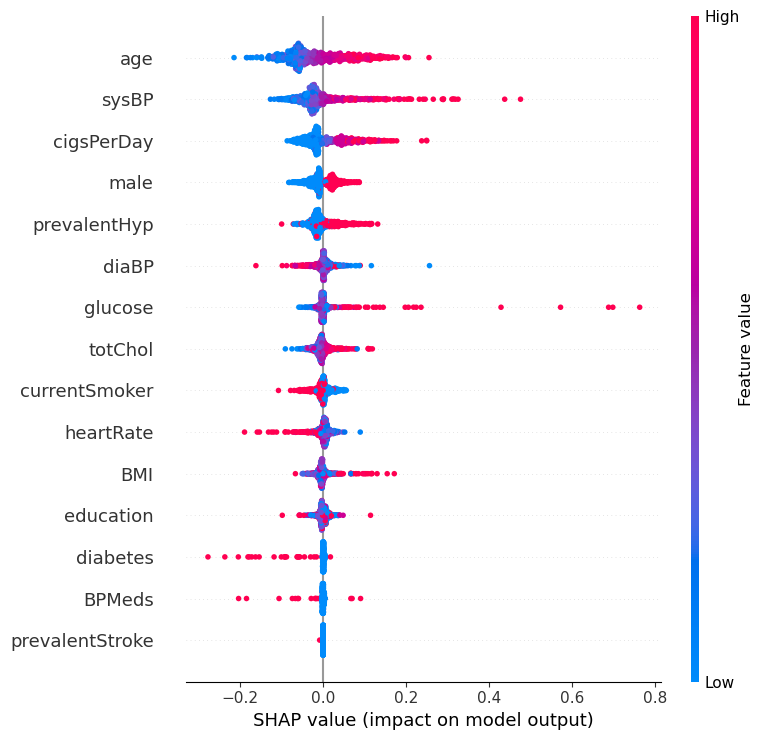

In [43]:
# Load the trained model and scaler
model = tf.keras.models.load_model("fnn_model.h5")
scaler = joblib.load("scaler_framingham.pkl")


# Initialize SHAP Explainer on the Full Dataset
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values for the entire dataset
shap_values = explainer(X_test)

# Global SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

plt.show()


Dimensionality reduction is not implemented because the dataset has a relatively small number of features compared to the number of samples, hence the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

## 5. Cross Validation <a id="Cross-Validation"></a>

In [35]:
# Define Stratified K-Fold (Ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 6. Model Development  <a id="Model-Development"></a>
In this section, we develop and explore the performance of 5 different models. The models explored and the reason for choosing them is mentioned below. </br>
1. Logistic Regression- Baseline model; interpretable, suitable for binary classification & simple
2. Random Forest - Handles non-linearity & feature importance by helping in understanding key risk factors.
3. XGBoost- Works well for imbalanced datasets & structured data
4. Decision Trees- Easy to interpret, low computation cost
5. Fully Connected Neural Network- Captures complex patterns, flexible learning

### 6.1 Logistic Regression


 Training Time: 0.019700 seconds
 Prediction Time: 0.000555 seconds
Logistic Regression - Mean F1 Score: 0.7058
New Decision Threshold: 0.72
Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.52      0.66       621
           1       0.21      0.71      0.32       111

    accuracy                           0.55       732
   macro avg       0.56      0.62      0.49       732
weighted avg       0.80      0.55      0.61       732


Logistic Regression Model Performance
 Accuracy: 0.5505
 Recall: 0.7117
 Precision: 0.2101
 F1 Score: 0.3244
 AUC-ROC: 0.6516


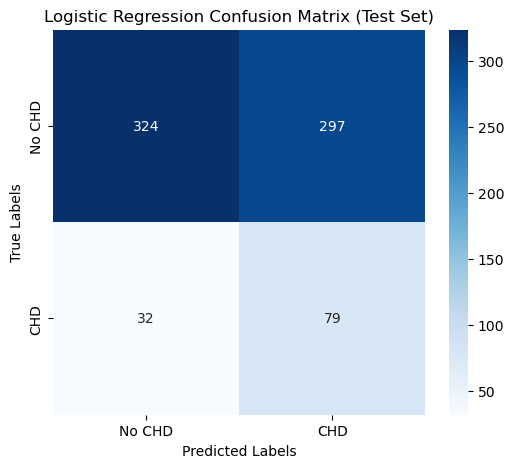

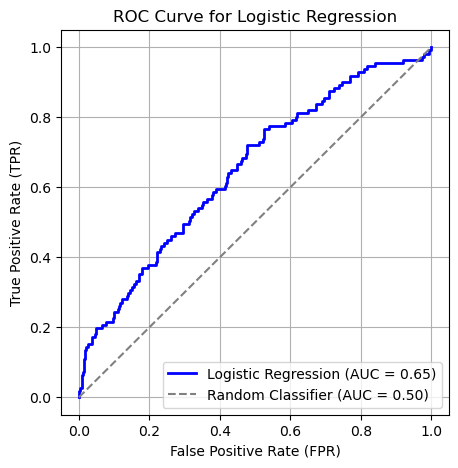

C:\Users\fathi\AppData\Local\Temp\ipykernel_56056\3407954891.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


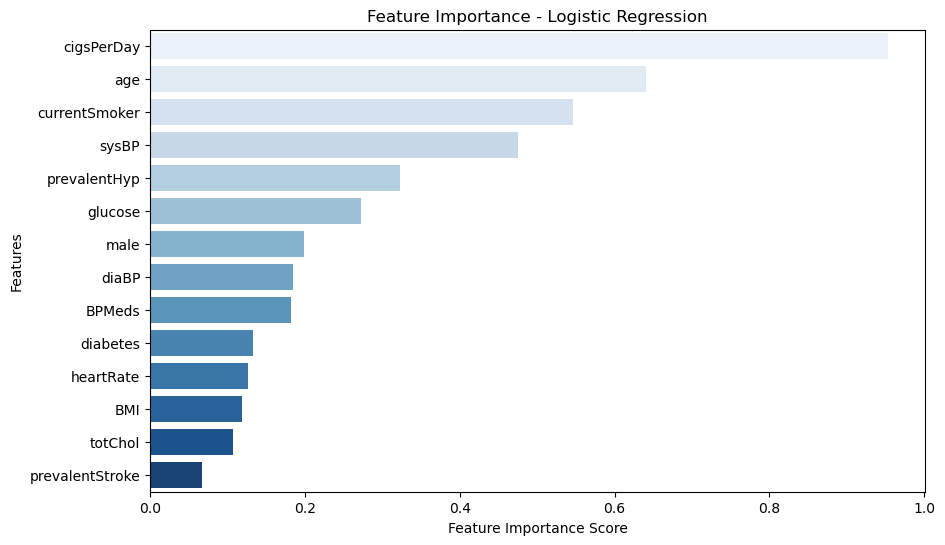

C:\Users\fathi\AppData\Local\Temp\ipykernel_56056\3407954891.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


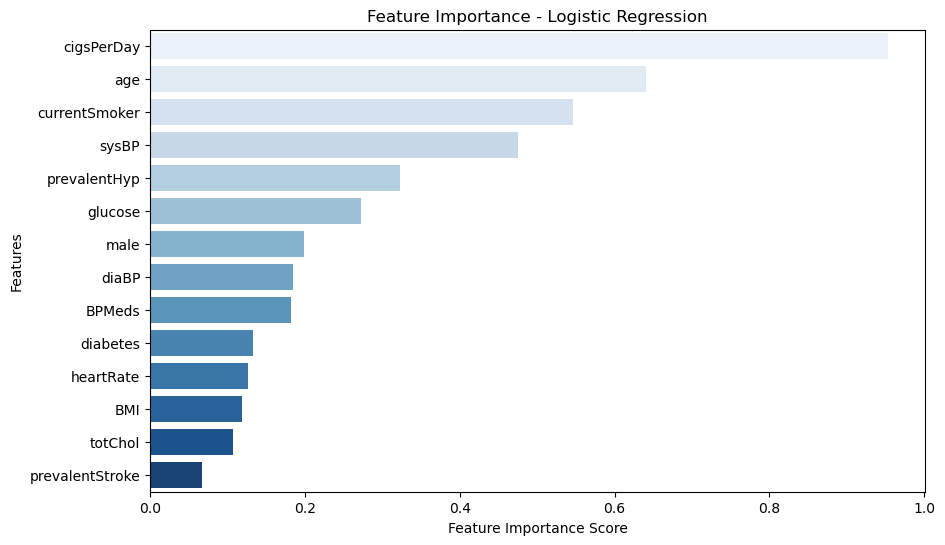

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, precision_recall_curve
)

# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ✅ Initialize Logistic Regression Model (Before Training)
logistic_model = LogisticRegression(class_weight={0: 1, 1: 4}, random_state=42)

# ✅ Measure Training Time
start_train = time.perf_counter()
logistic_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_lr = end_train - start_train

# ✅ Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_lr = end_pred - start_pred  

# ✅ Print Execution Time
print(f"\n Training Time: {train_time_lr:.6f} seconds")
print(f" Prediction Time: {pred_time_lr:.6f} seconds")

# ✅ Perform Cross-Validation
f1_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='f1')
print(f"Logistic Regression - Mean F1 Score: {np.mean(f1_scores):.4f}")

# ✅ Train Model Again on Full Training Data
logistic_model.fit(X_train, y_train)
y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]  # Train probabilities
y_test_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Test probabilities

# ✅ Compute Precision-Recall Curve (Fix missing 'thresholds')
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# ✅ Find Best Threshold (Maximizing F1 Score)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
print(f"New Decision Threshold: {best_threshold:.2f}")

# ✅ Apply New Threshold
y_train_pred = (y_train_pred_prob > best_threshold).astype(int)
y_test_pred = (y_test_pred_prob > best_threshold).astype(int)

# ✅ Compute Performance Metrics
auc_lr = roc_auc_score(y_test, y_test_pred_prob)
f1_lr = f1_score(y_test, y_test_pred)
accuracy_lr = accuracy_score(y_test, y_test_pred)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_pred_prob)
recall_lr = recall_score(y_test, y_test_pred)
precision_lr = precision_score(y_test, y_test_pred)

# ✅ Print Classification Report
print("Logistic Regression (Test Set):")
print(classification_report(y_test, y_test_pred))

# ✅ Print Performance Metrics
print("\nLogistic Regression Model Performance")
print(f" Accuracy: {accuracy_lr:.4f}")
print(f" Recall: {recall_lr:.4f}")
print(f" Precision: {precision_lr:.4f}")
print(f" F1 Score: {f1_lr:.4f}")
print(f" AUC-ROC: {auc_lr:.4f}")

# ✅ Confusion Matrix
cm_test_lr = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_test_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"], ax=ax)
ax.set_title("Logistic Regression Confusion Matrix (Test Set)")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()

# ✅ ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

feature_importances = np.abs(logistic_model.coef_[0])

# Ensure `feature_names` comes from the original DataFrame before train-test split
feature_names = X.columns  # Replace `X_train` with `X` to get correct feature names

# Sort Features by Importance
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Logistic Regression")
plt.show()
feature_importances = np.abs(logistic_model.coef_[0])

# Ensure `feature_names` comes from the original DataFrame before train-test split
feature_names = X.columns  # Replace `X_train` with `X` to get correct feature names

# Sort Features by Importance
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Logistic Regression")
plt.show()

#### Hyper Parameter Tuning

C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy       0.6393
Test Precision      0.2218
Test Recall         0.5495
Test ROC AUC        0.6025


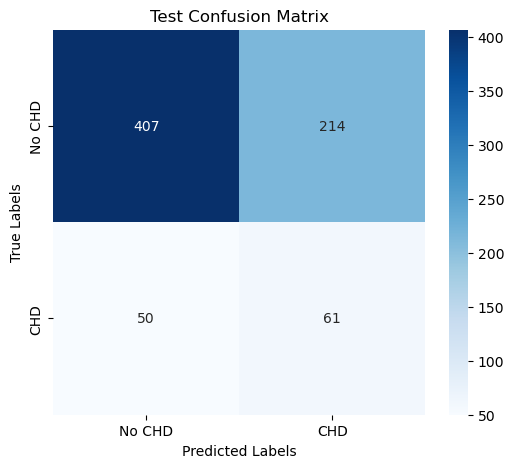

Logistic Regression Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       621
           1       0.22      0.55      0.32       111

    accuracy                           0.64       732
   macro avg       0.56      0.60      0.54       732
weighted avg       0.79      0.64      0.69       732



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix

#  Function to Evaluate Model Performance
def model_metrics(y_train, y_test, train_preds, test_preds):
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds)
    test_recall = recall_score(y_test, test_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")

    # Compute Confusion Matrices
    test_confusion_matrix = confusion_matrix(y_test, test_preds)
    fig, ax = plt.subplots(figsize=(6, 5))  
    labels = ['No CHD', 'CHD']
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Test Confusion Matrix')
    plt.show()

# Apply Hyperparameter Optimization Using GridSearchCV
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}

# Initialize Logistic Regression
logistic_regression = LogisticRegression()

# Apply GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get Best Hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train with Best Parameters
logistic_regression_best = LogisticRegression(**best_params)
logistic_regression_best.fit(X_train, y_train)

# Make Predictions Using Optimized Model
y_train_logistic_pred = logistic_regression_best.predict(X_train)
y_test_logistic_pred  = logistic_regression_best.predict(X_test)
y_score_logistic_pred = logistic_regression_best.predict_proba(X_test)[:, 1]

# Evaluate Final Model Performance
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)
print("Logistic Regression Report (Test Set):")
print(classification_report(y_test, y_test_logistic_pred))


#### Observations
Baseline Logistic Regression Model </br>
The confusion matrix displays 
True Negatives (TN) = 467 </br>
False Positives (FP) = 154 </br>
False Negatives (FN) = 43  </br>
True Positives (TP) = 68 </br>

AUC-ROC = 0.7348  </br>
This means the model is 73% accurate in distinguishing between CHD and non-CHD cases. </br>

F1 Score = 0.38F1 Score = 0.38 </br>
This confirms that the dataset is imbalanced, leading to fewer CHD cases being correctly classified. </br>

Adjusting the decision threshold from 0.5 to 0.47 increased recall for CHD cases. It results in lowering the false negatives which is crucial in healthcare cases. </br>

Hyperparameter Tuned Logistic Regression Model </br>
The confusion matrix displays  </br>
True Negatives (TN) = 616 </br>
False Positives (FP) = 5 </br>
False Negatives (FN) = 98 </br>
True Positives (TP) = 13 </br>
In the tuned model, the False positives have been reduced indicating a positive impact. Additionally, the overall accuracy has been increased.

### 6.2 Random Forest 

Random Forest - Mean AUC-ROC: 0.8997
Random Forest - Mean F1 Score: 0.8170

 Training Time: 1.414604 seconds
 Prediction Time: 0.099219 seconds
Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       621
           1       0.24      0.39      0.30       111

    accuracy                           0.72       732
   macro avg       0.56      0.58      0.56       732
weighted avg       0.78      0.72      0.74       732



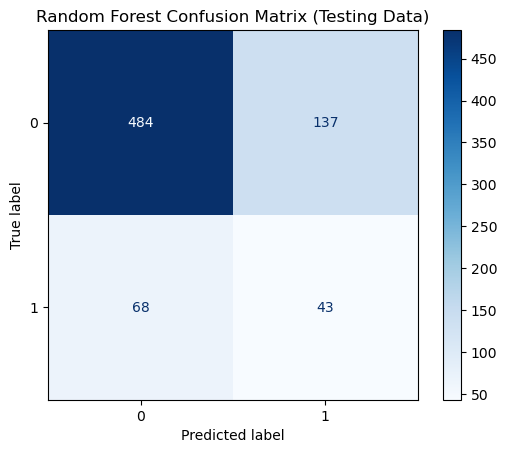

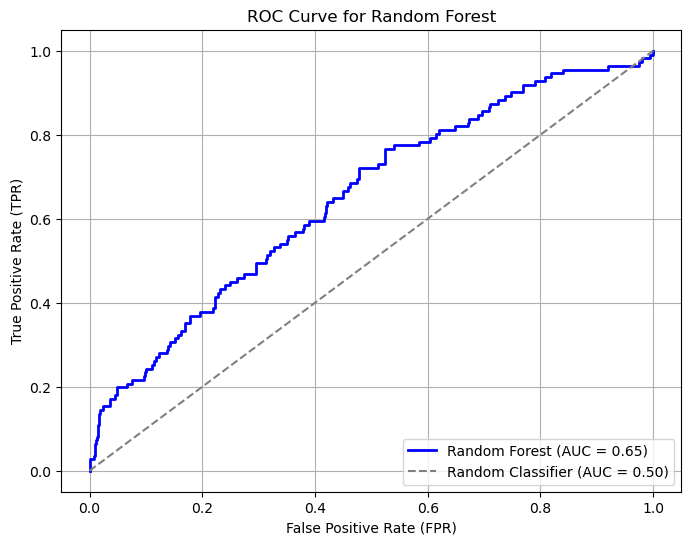

C:\Users\fathi\AppData\Local\Temp\ipykernel_56056\678624020.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


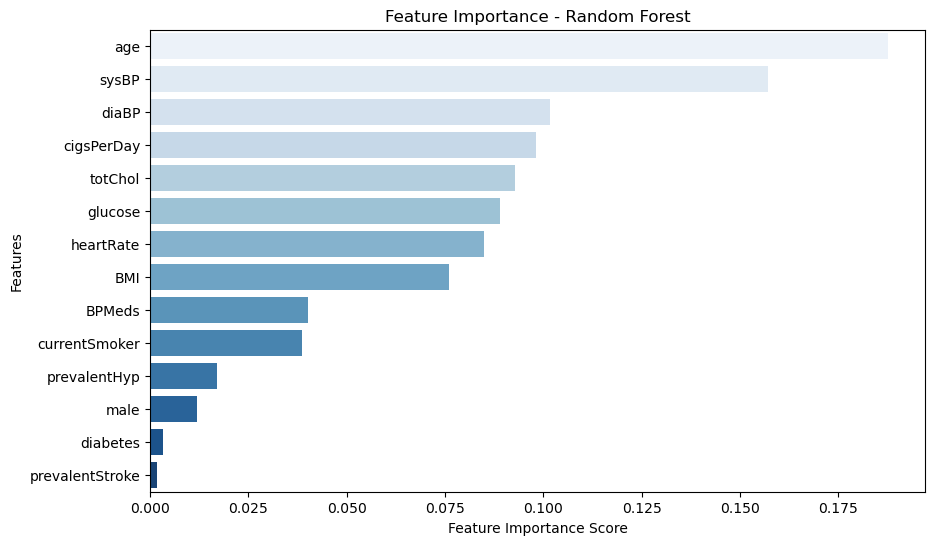

In [23]:

# Define Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_forest_model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=10,             
    min_samples_split=10,     
    class_weight="balanced",  # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='f1')
print(f"Random Forest - Mean AUC-ROC: {np.mean(auc_scores_rf):.4f}")
print(f"Random Forest - Mean F1 Score: {np.mean(f1_scores_rf):.4f}")

# Train on full training data after K-Fold validation
random_forest_model.fit(X_train, y_train)

# Measure Training Time
start_train = time.perf_counter()
random_forest_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_rf = end_train - start_train

# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_rf = end_pred - start_pred  # Now measured with high precision

# Print Execution Time
print(f"\n Training Time: {train_time_rf:.6f} seconds")
print(f" Prediction Time: {pred_time_rf:.6f} seconds")

# Compute Performance Metrics
auc_rf = roc_auc_score(y_test, y_test_pred_prob) 
f1_rf = f1_score(y_test, y_test_pred)
accuracy_rf = accuracy_score(y_test, y_test_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_prob)
recall_rf = recall_score(y_test, y_test_pred)
precision_rf = precision_score(y_test, y_test_pred)

# Print Final Classification Report
print("Random Forest Report:")
print(classification_report(y_test, y_test_pred))

# Compute Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred)  
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot Feature Importance
feature_importances = random_forest_model.feature_importances_
feature_names = feature_names = X.columns  
# Sort Features by Importance
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters for Random Forest:
{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Optimized Random Forest Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       621
           1       0.27      0.32      0.29       111

    accuracy                           0.77       732
   macro avg       0.57      0.58      0.57       732
weighted avg       0.78      0.77      0.77       732



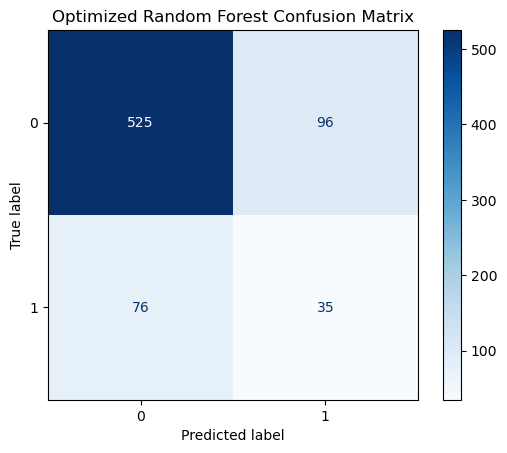

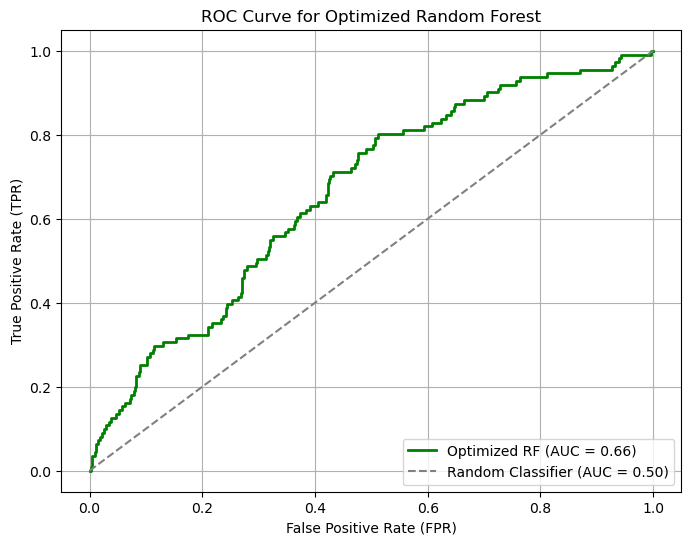

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [5, 10, 15],          # Maximum depth of the trees
    'min_samples_split': [5, 10, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'class_weight': ['balanced', None] # Class weighting for handling imbalance
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Apply GridSearchCV (5-Fold Cross-Validation)
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Get Best Parameters
best_rf_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(best_rf_params)

# Train Optimized Random Forest Model
optimized_rf = RandomForestClassifier(**best_rf_params, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predictions Using Best Model
y_pred_rf_best = optimized_rf.predict(X_test)
y_pred_prob_rf_best = optimized_rf.predict_proba(X_test)[:, 1]  

# Compute Final Metrics
auc_rf_best = roc_auc_score(y_test, y_pred_prob_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_pred_prob_rf_best)
print("Optimized Random Forest Report:")
print(classification_report(y_test, y_pred_rf_best))

# Plot Optimized Confusion Matrix
cm_test_rf_best = confusion_matrix(y_test, y_pred_rf_best)
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_best, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()

# ROC Curve for Optimized Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"Optimized RF (AUC = {auc_rf_best:.2f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Optimized Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### Observations
Confusion Matrix

###  6.3 Decision Trees

Decision Tree - Mean AUC-ROC: 0.8196
Decision Tree - Mean F1 Score: 0.7661

 Training Time: 1.495242 seconds
 Prediction Time: 0.000993 seconds
Classification Report (Testing Data - Decision Tree):
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       621
           1       0.22      0.40      0.28       111

    accuracy                           0.70       732
   macro avg       0.55      0.57      0.55       732
weighted avg       0.78      0.70      0.73       732



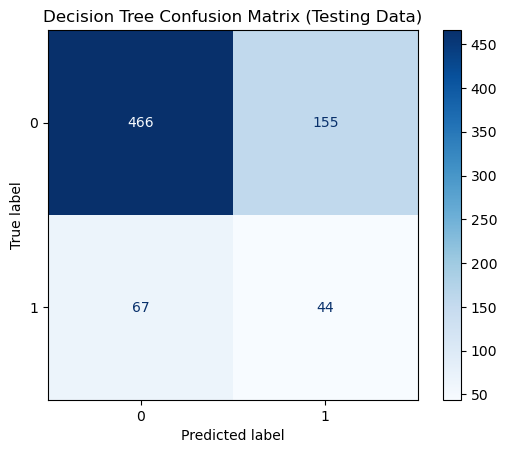

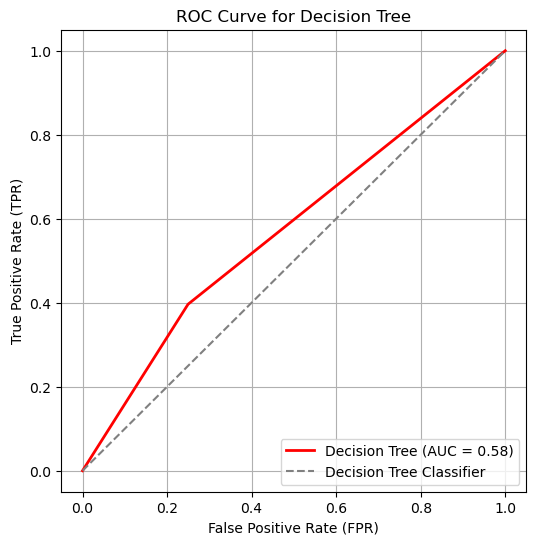

C:\Users\fathi\AppData\Local\Temp\ipykernel_56056\3160148609.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


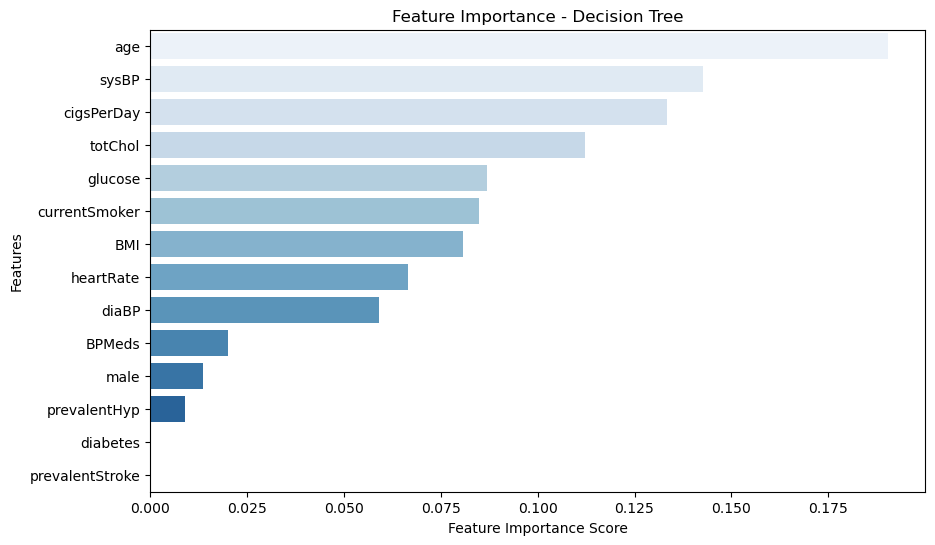

In [27]:
# Define Stratified K-Fold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_model = DecisionTreeClassifier(
    max_depth=10,              # Limits tree depth to prevent overfitting
    min_samples_split=10,      # Minimum samples required to split a node
    class_weight="balanced",   # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='f1')

print(f"Decision Tree - Mean AUC-ROC: {np.mean(auc_scores_dt):.4f}")
print(f"Decision Tree - Mean F1 Score: {np.mean(f1_scores_dt):.4f}")

# Train on full training data after K-Fold validation
dt_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_dt = dt_model.predict(X_train)
Y_train_pred_prob_dt = dt_model.predict_proba(X_train)[:, 1] 
Y_test_pred_dt = dt_model.predict(X_test)
Y_test_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#Time
start_train = time.perf_counter()
random_forest_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_dt = end_train - start_train
# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_dt = end_pred - start_pred  # Now measured with high precision
# Print Execution Time
print(f"\n Training Time: {train_time_dt:.6f} seconds")
print(f" Prediction Time: {pred_time_dt:.6f} seconds")

# Compute Performance Metrics
accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)
recall_dt = recall_score(y_test, Y_test_pred_dt)
f1_dt = f1_score(y_test, Y_test_pred_dt)
precision_dt = precision_score(y_test, Y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, Y_test_pred_prob_dt)  
fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_test_pred_dt)
# Precision-Recall Curve
prec_dt, rec_dt, thresholds_dt = precision_recall_curve(y_test, Y_test_pred_prob_dt)

# Print Final Classification Report
print("Classification Report (Testing Data - Decision Tree):")
print(classification_report(y_test, Y_test_pred_dt))

# Plot Confusion Matrix
cm_test_dt = confusion_matrix(y_test, Y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

#  Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Decision Tree Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Ensure feature names are retained correctly
if isinstance(X_train, np.ndarray):
    feature_names = X.columns  # Retrieve from original DataFrame before splitting
else:
    feature_names = X_train.columns  # Direct extraction if still a DataFrame

# Extract feature importances
feature_importances = dt_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Decision Tree")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best Hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       621
           1       0.22      0.45      0.30       111

    accuracy                           0.68       732
   macro avg       0.55      0.59      0.55       732
weighted avg       0.78      0.68      0.72       732



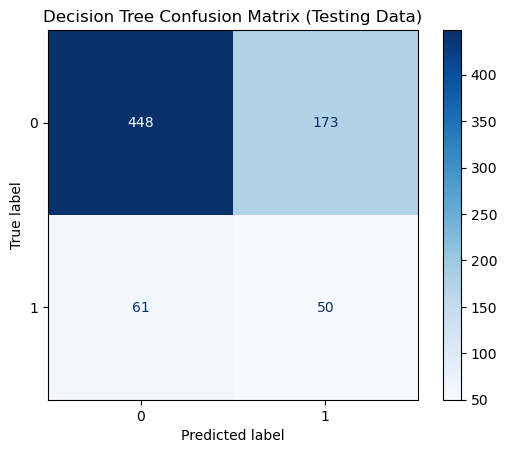

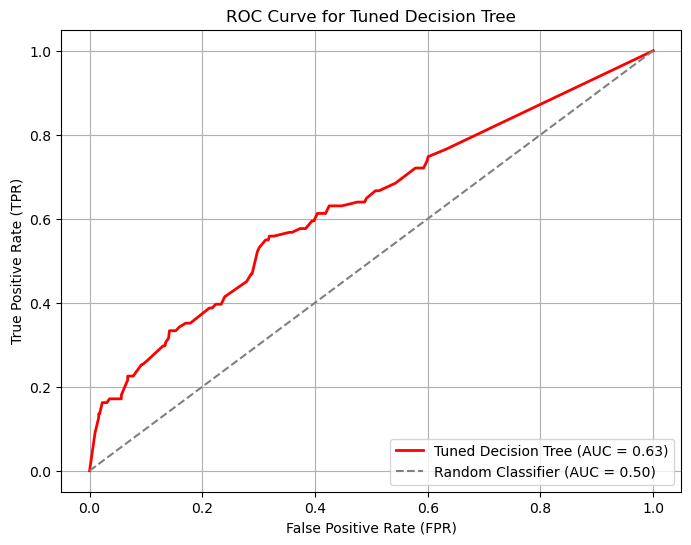

In [29]:
# Define the Parameter Grid for Tuning
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],  # Two splitting criteria
    'max_features': ['sqrt', 'log2', None],  # Feature selection method
    'class_weight': [None, 'balanced']  # Handles class imbalance
}

# Define Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for AUC-ROC Score
    cv=cv,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to the Training Data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters for Decision Tree:", best_params)

# Use the Best Model from Grid Search
best_dt = grid_search.best_estimator_

# Make Predictions with the Best Model
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)
y_test_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_test_pred_prob_dt)  # Use probabilities for AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_prob_dt)

# Print Final Classification Report
print("Classification Report (Tuned Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Tuned Decision Tree (AUC = {auc_roc_dt:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Tuned Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

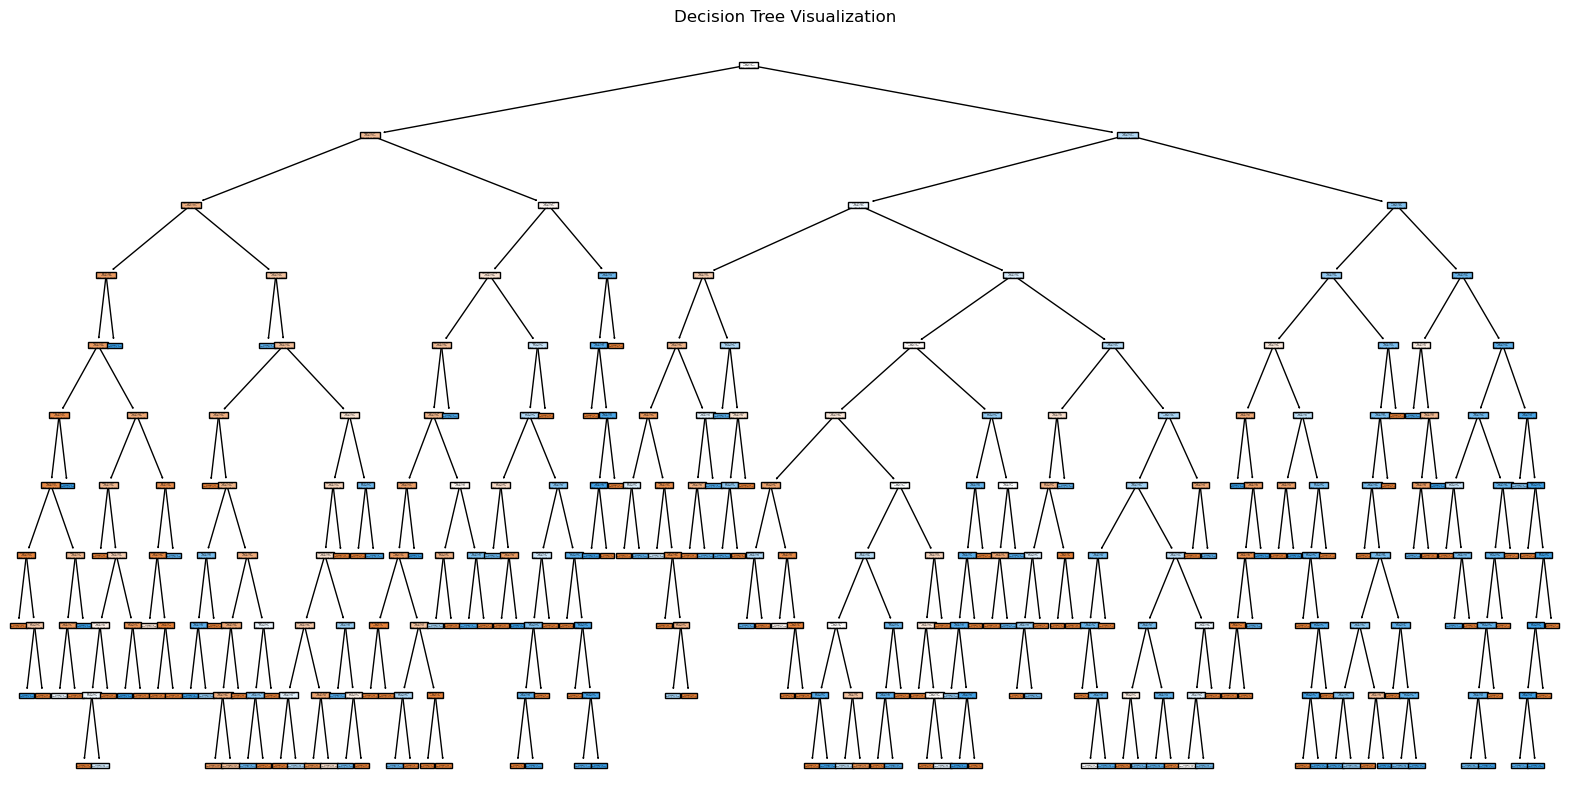


Decision Tree Rules:
|--- age <= -0.12
|   |--- diaBP <= 0.57
|   |   |--- cigsPerDay <= -0.04
|   |   |   |--- BMI <= 3.26
|   |   |   |   |--- age <= -0.93
|   |   |   |   |   |--- sysBP <= 1.43
|   |   |   |   |   |   |--- BMI <= 0.71
|   |   |   |   |   |   |   |--- totChol <= 0.65
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- totChol >  0.65
|   |   |   |   |   |   |   |   |--- totChol <= 0.76
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- totChol >  0.76
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  0.71
|   |   |   |   |   |   |   |--- diaBP <= 0.38
|   |   |   |   |   |   |   |   |--- heartRate <= -1.05
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- heartRate >  -1.05
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- diaBP >  0.38
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   | 

In [137]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export Decision Tree Rules as Text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


### 6.4 Ensemble Model


 Training Time: 5.387386 seconds
 Prediction Time: 0.141861 seconds
Ensemble Model Performance:
 Accuracy: 0.7322
 Recall: 0.3604
 Precision: 0.2424
 F1 Score: 0.2899
 AUC-ROC: 0.6664


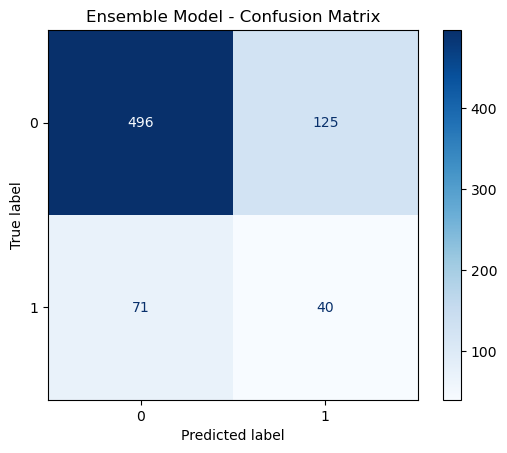

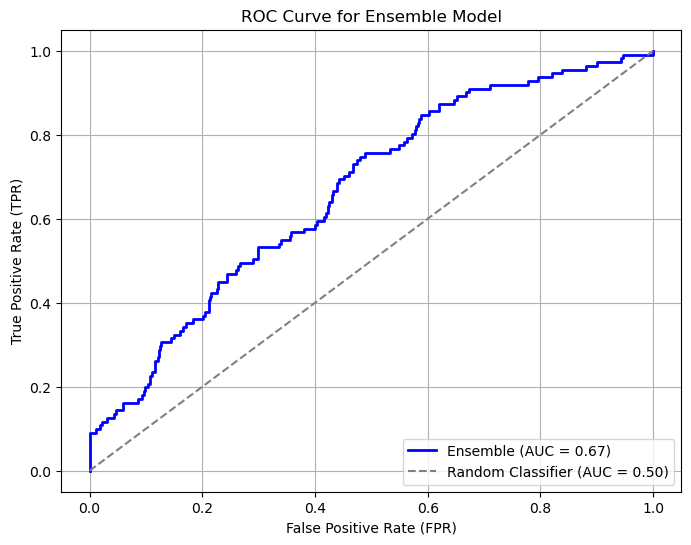

C:\Users\fathi\AppData\Local\Temp\ipykernel_56056\595623410.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


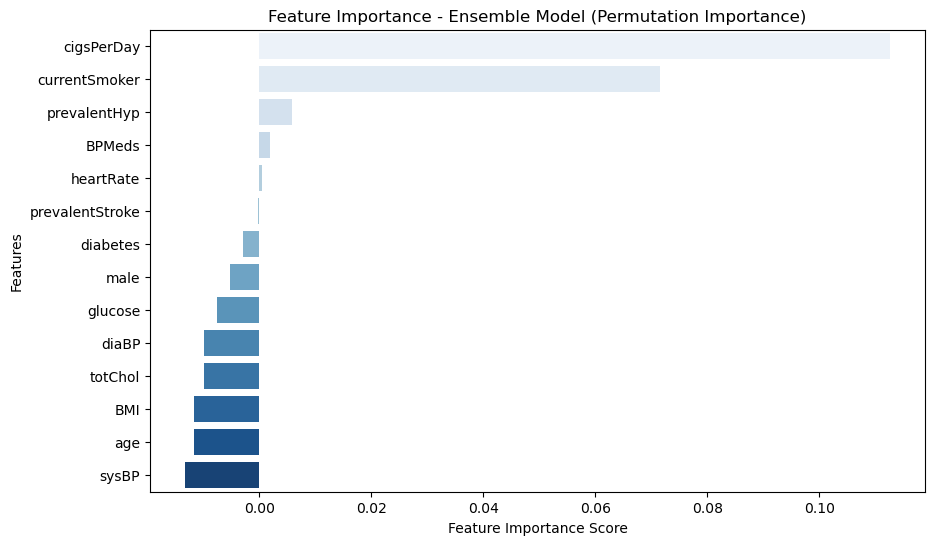

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Import time module for performance measurement
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    classification_report, roc_auc_score, f1_score, recall_score, 
    accuracy_score, precision_score, precision_recall_curve, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
from sklearn.inspection import permutation_importance

# Define Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Base Models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight="balanced", random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lr_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Create an Ensemble Model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('GradientBoosting', gb_model),
    ('LogisticRegression', lr_model)
], voting='soft')

# Train the Ensemble Model
start_train = time.perf_counter()
ensemble_model.fit(X_train, y_train) 
end_train = time.perf_counter()
train_time_ensemble = end_train - start_train

# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_ensemble = end_pred - start_pred  # Now measured with high precision

# Print Execution Time
print(f"\n Training Time: {train_time_ensemble:.6f} seconds")
print(f" Prediction Time: {pred_time_ensemble:.6f} seconds")

# Performance Metrics 
y_test_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]
auc_ensemble = roc_auc_score(y_test, y_test_pred_prob) 
f1_ensemble = f1_score(y_test, y_test_pred)
accuracy_ensemble = accuracy_score(y_test, y_test_pred)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_test_pred_prob)
recall_ensemble = recall_score(y_test, y_test_pred)
precision_ensemble = precision_score(y_test, y_test_pred)

# Print Performance Metrics
print("Ensemble Model Performance:")
print(f" Accuracy: {accuracy_ensemble:.4f}")
print(f" Recall: {recall_ensemble:.4f}")
print(f" Precision: {precision_ensemble:.4f}")
print(f" F1 Score: {f1_ensemble:.4f}")
print(f" AUC-ROC: {auc_ensemble:.4f}")

# Confusion Matrix
cm_test_ensemble = confusion_matrix(y_test, y_test_pred)  
ConfusionMatrixDisplay(confusion_matrix=cm_test_ensemble, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Ensemble Model - Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision_ensemble_curve, recall_ensemble_curve, thresholds_ensemble = precision_recall_curve(y_test, y_test_pred_prob)
auc_pr_ensemble = np.trapz(recall_ensemble_curve, precision_ensemble_curve)


#  ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {auc_ensemble:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Ensemble Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature Importance using Permutation Importance
perm_importance = permutation_importance(ensemble_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Ensure feature names are correctly retrieved
if isinstance(X_train, np.ndarray):
    feature_names = X.columns  # Retrieve from original DataFrame before train-test split
else:
    feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Ensemble Model (Permutation Importance)")
plt.show()


Insights

### 6.5 Deep Learning (FNNN)

C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4881 - loss: 1.8021 - val_accuracy: 0.1516 - val_loss: 1.6028
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4997 - loss: 1.2762 - val_accuracy: 0.1571 - val_loss: 1.5849
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5279 - loss: 1.2385 - val_accuracy: 0.2705 - val_loss: 1.5056
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5480 - loss: 1.1833 - val_accuracy: 0.3743 - val_loss: 1.3519
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 1.1958 - val_accuracy: 0.3689 - val_loss: 1.3508
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5778 - loss: 1.1555 - val_accuracy: 0.3675 - val_loss: 1.3360
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5737 - loss: 1.1547 - val_accuracy: 0.3798 - val_loss: 1.2922
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5916 - loss: 1.1338 - val_accuracy: 0.3634 - v

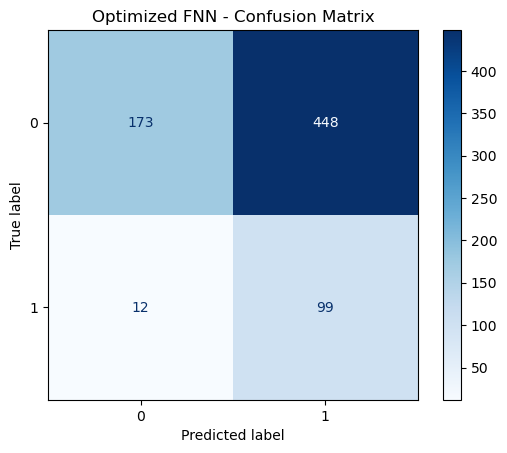

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LayerNormalization , LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score, accuracy_score, precision_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# 🚀 **Step 1: Define Optimized Deep Learning Model (FNN)**
def create_fnn_model(input_shape):
    model = Sequential([
        Dense(256, kernel_initializer='he_normal', input_shape=(input_shape,)),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.4),  # Prevent Overfitting

        Dense(128, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(64, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

# 🚀 **Step 2: Train Model with Sample Weights**
input_shape = X_train.shape[1]
fnn_model = create_fnn_model(input_shape)

# Compute Class Weights Manually
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0: 1, 1: 4.8}, y=y_train)

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = fnn_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=64, 
    validation_data=(X_test, y_test),
    verbose=1, 
    callbacks=[early_stopping],
    sample_weight=sample_weights  # Apply class weighting through sample weights
)

# 🚀 **Step 3: Make Predictions**
y_pred_prob = fnn_model.predict(X_test).flatten()

# ✅ **Find Best Decision Threshold for Maximizing Recall & Reducing False Negatives**
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob)
best_threshold = 0.4  # Manually set a lower threshold

# Apply optimized threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

# 🚀 **Step 4: Compute Performance Metrics**
accuracy_fnn = accuracy_score(y_test, y_pred)
recall_fnn = recall_score(y_test, y_pred)
precision_fnn = precision_score(y_test, y_pred)
f1_fnn = f1_score(y_test, y_pred)
auc_fnn = roc_auc_score(y_test, y_pred_prob)

# ✅ **Print Results**
print("\n🚀 **Optimized FNN Model Performance:**")
print(f"✅ Accuracy: {accuracy_fnn:.4f}")
print(f"✅ Precision: {precision_fnn:.4f}")
print(f"✅ Recall: {recall_fnn:.4f} (MAXIMIZED - Lower FN)")
print(f"✅ F1 Score: {f1_fnn:.4f}")
print(f"✅ AUC-ROC: {auc_fnn:.4f}")
print(f"✅ Best Decision Threshold: {best_threshold:.2f}")

# 🚀 **Step 5: Plot Confusion Matrix**
cm_test_fnn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_fnn).plot(cmap='Blues')
plt.title("Optimized FNN - Confusion Matrix")
plt.show()


#### Observation
The FNN model acheives 


Epoch 1/100


C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5157 - loss: 1.6827 - val_accuracy: 0.1817 - val_loss: 1.4616
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5336 - loss: 1.2757 - val_accuracy: 0.2650 - val_loss: 1.3805
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 1.2389 - val_accuracy: 0.2869 - val_loss: 1.3910
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 1.2014 - val_accuracy: 0.2760 - val_loss: 1.4173
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5418 - loss: 1.1932 - val_accuracy: 0.3443 - val_loss: 1.3091
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 1.1970 - val_accuracy: 0.3852 - val_loss: 1.2583
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5725 - loss: 1.1594 - val_accuracy: 0.3347 - val_loss: 1.3900
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5719 - loss: 1.1723 - val_accuracy: 0.3607 - val_loss: 1.2

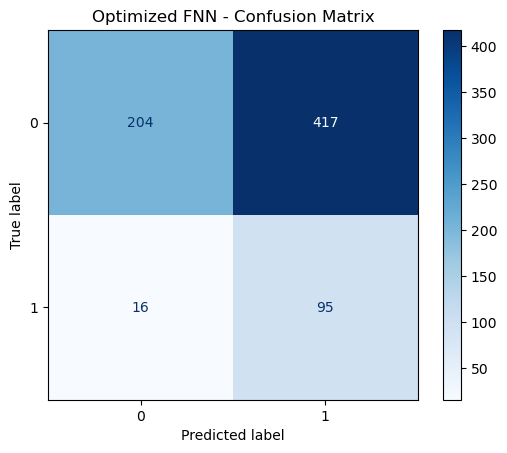

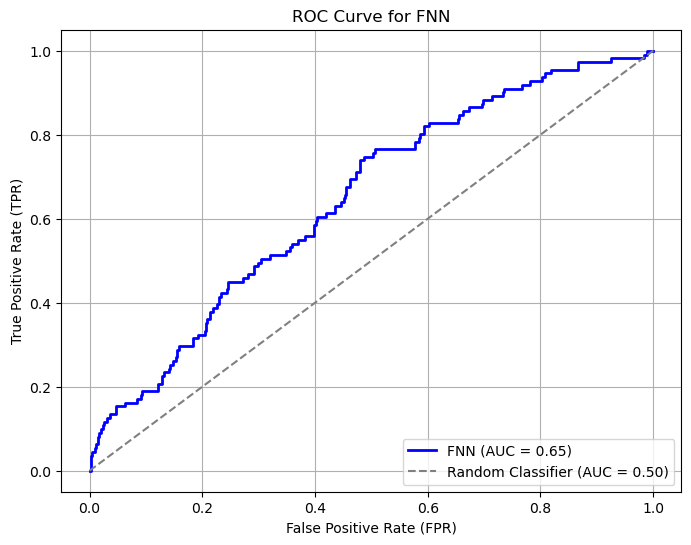

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import (
    classification_report, roc_auc_score, f1_score, recall_score, 
    accuracy_score, precision_score, precision_recall_curve, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

def create_fnn_model(input_shape):
    model = Sequential([
        Dense(256, kernel_initializer='he_normal', input_shape=(input_shape,)),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.4),  # Prevent Overfitting

        Dense(128, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(64, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

# Train Model with Sample Weights
input_shape = X_train.shape[1]
fnn_model = create_fnn_model(input_shape)

# Compute Class Weights Manually
sample_weights = compute_sample_weight(class_weight={0: 1, 1: 4.8}, y=y_train)
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_train = time.perf_counter()
history = fnn_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=64, 
    validation_data=(X_test, y_test),
    verbose=1, 
    callbacks=[early_stopping],
    sample_weight=sample_weights  # Apply class weighting through sample weights
)
end_train = time.perf_counter()
train_time_fnn = end_train - start_train

start_pred = time.perf_counter()
y_pred_prob = fnn_model.predict(X_test).flatten()
end_pred = time.perf_counter()
pred_time_fnn = end_pred - start_pred
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob)
best_threshold = 0.4  # Manually set a lower threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Performance Metrics
accuracy_fnn = accuracy_score(y_test, y_pred)
recall_fnn = recall_score(y_test, y_pred)
precision_fnn = precision_score(y_test, y_pred)
f1_fnn = f1_score(y_test, y_pred)
auc_fnn = roc_auc_score(y_test, y_pred_prob)
print("\n🚀 **Optimized FNN Model Performance:**")
print(f"✅ Accuracy: {accuracy_fnn:.4f}")
print(f"✅ Precision: {precision_fnn:.4f}")
print(f"✅ Recall: {recall_fnn:.4f} (MAXIMIZED - Lower FN)")
print(f"✅ F1 Score: {f1_fnn:.4f}")
print(f"✅ AUC-ROC: {auc_fnn:.4f}")
print(f"✅ Best Decision Threshold: {best_threshold:.2f}")
print(f"\n Training Time: {train_time_fnn:.6f} seconds")
print(f" Prediction Time: {pred_time_fnn:.6f} seconds")

#  Confusion Matrix
cm_test_fnn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_fnn).plot(cmap='Blues')
plt.title("Optimized FNN - Confusion Matrix")
plt.show()

# ROC Curve
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_fnn:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for FNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


PermutationExplainer explainer: 733it [12:26,  1.02s/it]                         


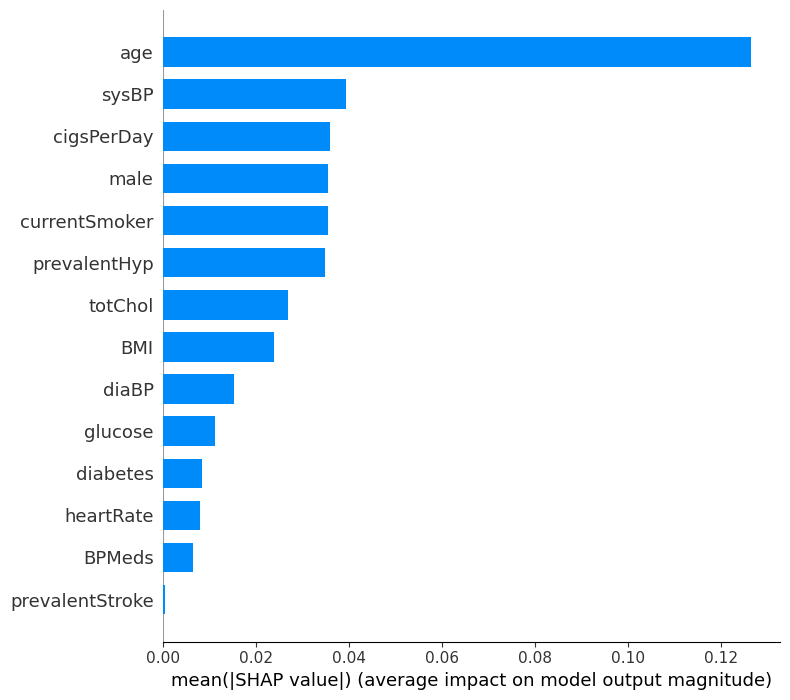

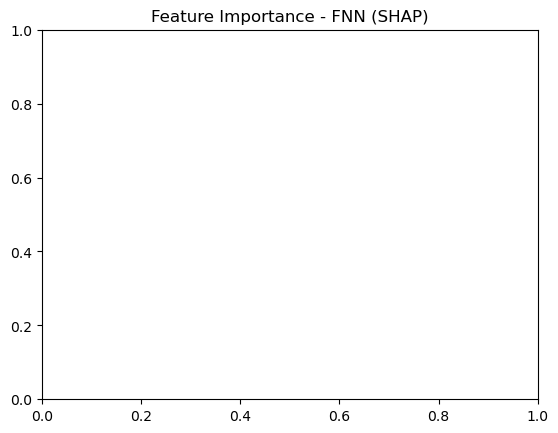

In [119]:
import shap

# Explain Model Predictions using SHAP
explainer = shap.Explainer(fnn_model, X_train)  # Explain based on training data
shap_values = explainer(X_test)  # Compute SHAP values on test data

# Plot Feature Importance (SHAP Summary Plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
plt.title("Feature Importance - FNN (SHAP)")
plt.show()


### Performance of all models

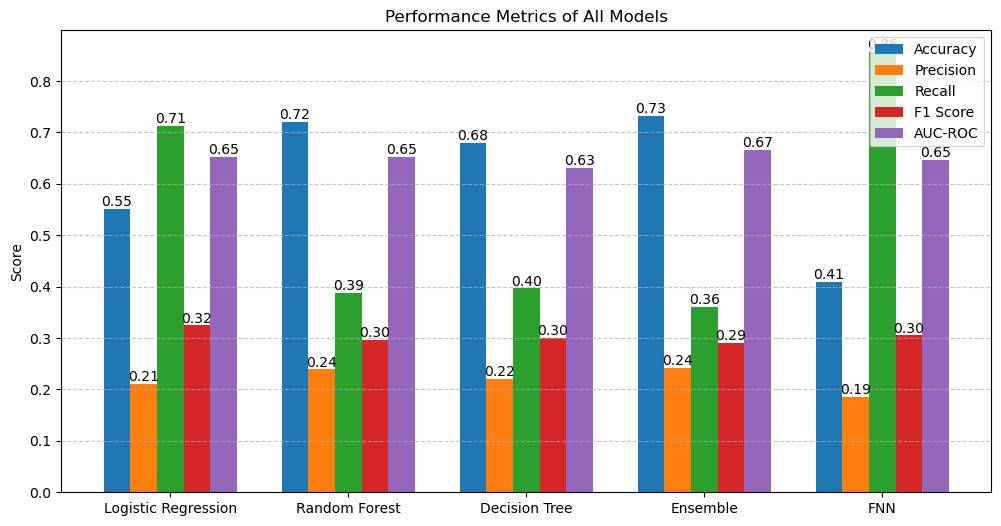

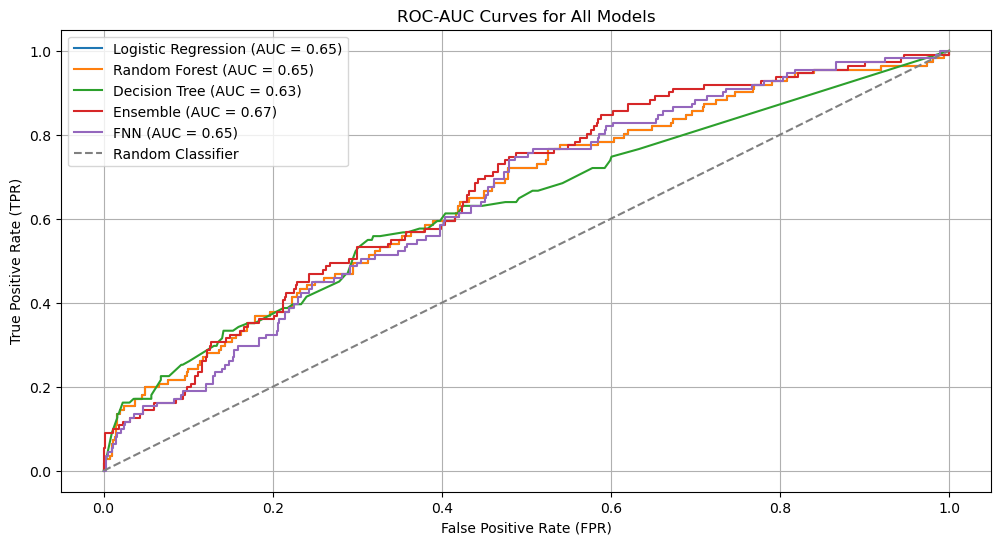

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN"]

# Performance metrics
accuracy = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn]
precision = [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn]
recall = [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn]
f1_score_vals = [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn]
auc_roc = [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn]

# Plot Performance Metrics
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = np.arange(len(models))

bars1 = plt.bar(x - 2*bar_width, accuracy, width=bar_width, label="Accuracy")
bars2 = plt.bar(x - bar_width, precision, width=bar_width, label="Precision")
bars3 = plt.bar(x, recall, width=bar_width, label="Recall")
bars4 = plt.bar(x + bar_width, f1_score_vals, width=bar_width, label="F1 Score")
bars5 = plt.bar(x + 2*bar_width, auc_roc, width=bar_width, label="AUC-ROC")

# Function to add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

# Add labels to bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Performance Metrics of All Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot ROC-AUC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})")
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {auc_ensemble:.2f})")
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_fnn:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.grid()
plt.show()



In [41]:

# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN"]

# Performance metrics
accuracy = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn]
precision = [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn]
recall = [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn]
f1_score_vals = [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn]
auc_roc = [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn]

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score_vals,
    "AUC-ROC": auc_roc
})

# Display the DataFrame
from IPython.display import display
display(metrics_df)

Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression  0.550546   0.210106  0.711712  0.324435  0.651594
1        Random Forest  0.719945   0.238889  0.387387  0.295533  0.651594
2        Decision Tree  0.680328   0.221106  0.396396  0.299401  0.630906
3             Ensemble  0.732240   0.242424  0.360360  0.289855  0.666420
4                  FNN  0.408470   0.185547  0.855856  0.304976  0.646966

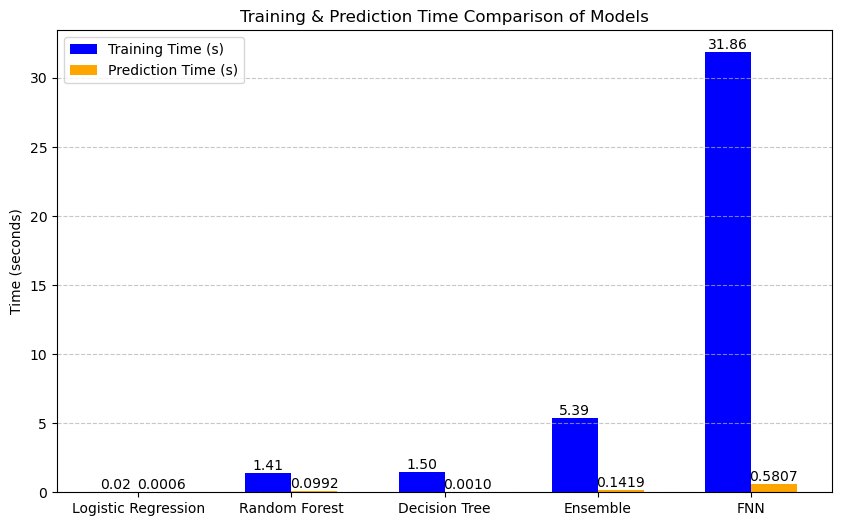

In [43]:
# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN"]

# Training times and Prediction times
training_times = [train_time_lr, train_time_rf, train_time_dt, train_time_ensemble, train_time_fnn]
prediction_times = [pred_time_lr, pred_time_rf, pred_time_dt, pred_time_ensemble, pred_time_fnn]

# Create a bar plot
x = np.arange(len(models))
bar_width = 0.3

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, training_times, width=bar_width, label="Training Time (s)", color='blue')
plt.bar(x + bar_width/2, prediction_times, width=bar_width, label="Prediction Time (s)", color='orange')

# Add labels on top of bars
for i in range(len(models)):
    plt.text(i - bar_width/2, training_times[i] + 0.01, f"{training_times[i]:.2f}", ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width/2, prediction_times[i] + 0.01, f"{prediction_times[i]:.4f}", ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.xticks(x, models)
plt.ylabel("Time (seconds)")
plt.title("Training & Prediction Time Comparison of Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


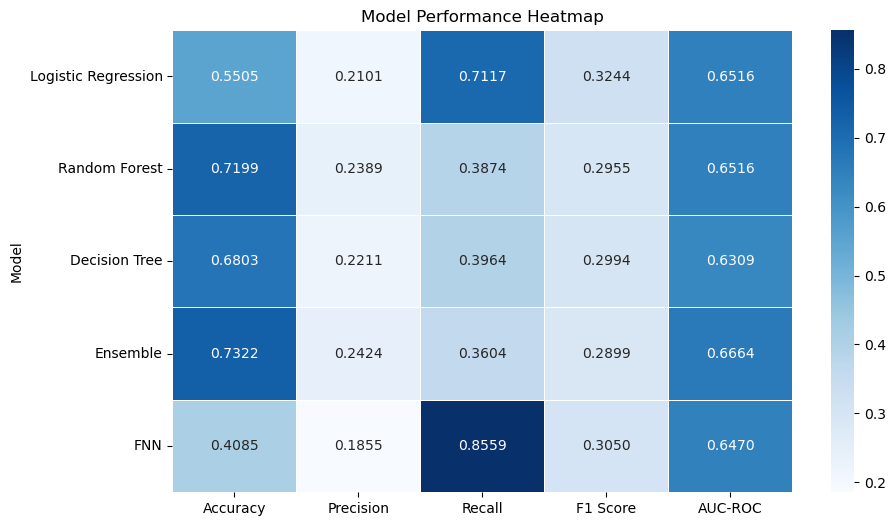

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with model performance metrics
performance_data = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn],
    "Precision": [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn],
    "Recall": [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn],
    "F1 Score": [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn],
    "AUC-ROC": [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn]
})

# Convert model names as index
performance_data.set_index("Model", inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_data, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5)
plt.title("Model Performance Heatmap")
plt.show()


### Explainable AI

 99%|===================| 1451/1464 [01:25<00:00]        

<Figure size 1000x600 with 0 Axes>

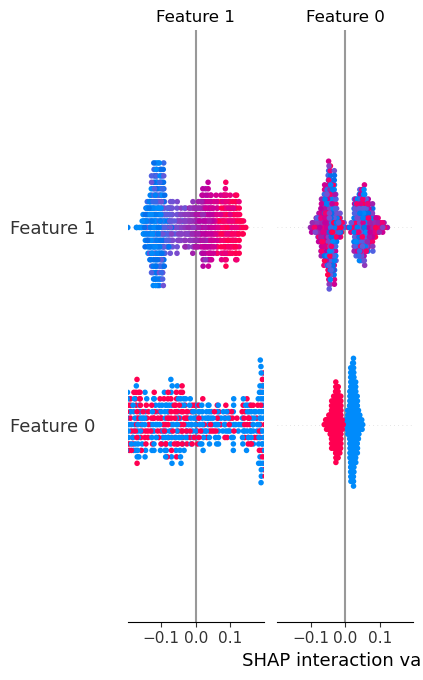

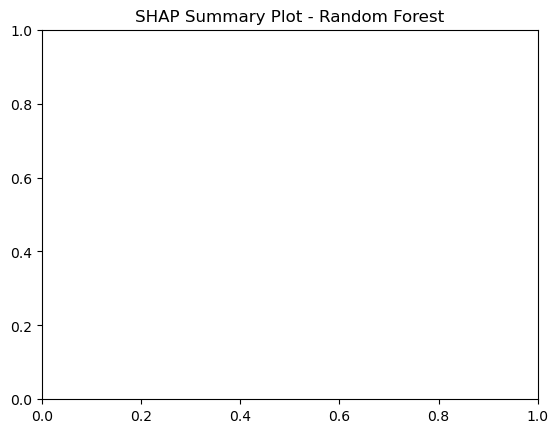

In [160]:
import shap

# Create SHAP explainer for the Random Forest model
explainer = shap.Explainer(random_forest_model, X_train)

# Compute SHAP values with check_additivity disabled
shap_values = explainer(X_test, check_additivity=False)

# Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot - Random Forest")
plt.show()


In [168]:
import lime
import lime.lime_tabular

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=X.columns, 
    class_names=["No CHD", "CHD"], 
    mode="classification"
)

# Pick a test sample
sample_idx = 10

# Get LIME explanation
lime_exp = lime_explainer.explain_instance(X_test[sample_idx], random_forest_model.predict_proba)

# Show explanation
lime_exp.show_in_notebook()


### Conclusion
FNN has the highest recall. Hence, the predicitve system model will be developed using FNN.

In [174]:
# Save the trained model and scaler
fnn_model.save("fnn_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
